# Project 2: Housing Price Prediction in Ames, Iowa

## Executive Summary

### Problem Statement
My problem statement is: How might I better estimate housing prices in Ames, Iowa so that I can manage potential buyers' expectations.

### Approach
My approach of this project is to study the historical housing prices in Ames and the housing dataset features provided by Ames, Iowa Assessor's Office. The processes involved data preparation, data massage, data visualization, data analysis and regularization. 

### Stakeholder
I am a freelance data analyst building a housing price prediction model and my prime stakeholders are property agents/agencies who will use the model to manage their potential buyers' expectations.

Other potential stackholders include local banks and Ames Housing Authority.

### Data source
The housing data set provides historical housing prices from 1872 to 2010, and 80 other features related to the property and sales process.
- [Ames, Iowa Housing Dataset](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

### Contents:
 - [Train Data Import and Cleaning](#Train-Data-Import-and-Cleaning)
 - [Test Data Import and Cleaning](#Test-Data-Import-and-Cleaning)
 - [Train Data EDA](#Train-Data-EDA)
 - [Train Data Features Engineering](#Train-Data-Features-Engineering)
 - [Test Data Features Engineering](#Test-Data-Features-Engineering)
 - [Train Data Linear Model Selection and Regularization](#Train-Data-Linear-Model-Selection-and-Regularization)
 - [Test Data Linear Model Selection and Regularization](#Test-Data-Linear-Model-Selection-and-Regularization)
 - [Conclusion](#Conclusion)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from IPython.display import Image
%matplotlib inline
sns.set_style('whitegrid')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Train Data Import and Cleaning

In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
display(train.shape)
display(train.head())

(2051, 81)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# check all the columns' name in the dataframe
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Seem like the columns' name have the combination of upper-case letters, lower-case letters and spacing in between which is abit complicated. Thus, I have written a function to change all characters to lower-case letters and replace the spacing with underscore character.

In [5]:
def update_cols(df):
    df.columns = [x.lower().replace(' ','_') for x in df.columns]
    return df

In [6]:
# update and re-run the column checking to make sure all the columns' name have updated
update_cols(train)
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [7]:
# check the data type under each column
train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

In [8]:
# I will first convert the data back to their designated data types
# this will be easier for me to group them into categorical and numerical columns
# I will use the grouping for my EDA later
def num_to_str(df):
    df['ms_subclass'] = df['ms_subclass'].astype(str)
    df['overall_qual'] = df['overall_qual'].astype(str)
    df['overall_cond'] = df['overall_cond'].astype(str)
    df['pid'] = df['pid'].astype(str)
    return

In [9]:
num_to_str(train)

In [10]:
# re-check to make sure the data types have updated
train.dtypes

id                   int64
pid                 object
ms_subclass         object
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual        object
overall_cond        object
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

In [11]:
# Check the null data inside the dataframe
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
total_bsmt_sf        1
dtype: int64

For the section below, I will do the manual imputation for the null data points of some features. Then, I will use the function to replace other features to replace the null data points to NA for categorical data and 0 for numerical data.

In [12]:
lot_mean = train.groupby('neighborhood')['lot_frontage'].mean()

In [13]:
lot_mean = lot_mean.fillna(np.mean(lot_mean))

In [14]:
lot_mean.head()

neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    56.357143
ClearCr    92.500000
Name: lot_frontage, dtype: float64

In [15]:
train['lot_frontage'] = train['lot_frontage'].fillna(train['neighborhood'])

In [16]:
train['lot_frontage'] = train['lot_frontage'].map(lambda x: lot_mean[x] if type(x)==str else x)

I will replace the null data point of the `lot_frontage` with the mean value of the `lot_frontage` of each `neighborhood`

In [17]:
mas_mean = train.groupby('neighborhood')['mas_vnr_area'].mean()

In [18]:
mas_mean = mas_mean.fillna(np.mean(mas_mean))

In [19]:
mas_mean.head()

neighborhood
Blmngtn     41.863636
Blueste      0.000000
BrDale     388.578947
BrkSide      6.052632
ClearCr     87.629630
Name: mas_vnr_area, dtype: float64

In [20]:
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(train['neighborhood'])

In [21]:
train['mas_vnr_area'] = train['mas_vnr_area'].map(lambda x: mas_mean[x] if type(x)==str else x)

I will replace the null data point of the `mas_vnr_area` with the mean value of the `mas_vnr_area` of each `neighborhood`

In [22]:
train['mas_vnr_type'].isnull().sum()

22

In [23]:
# replace the null of mas_vnr_type to none
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

I will replace the null value of `mas_vnr_type` to None because around 55% of the properties do not have masonry, and 22 rows is around 1% of the data which will not affect the analysis much.

In [24]:
# identify percentage of garage_yr_blt == year_built
pct_eq_yr = (train.loc[train['year_built'] == train['garage_yr_blt']]['garage_yr_blt'].count())/train.shape[0]
print('Percentage of garage_yr_blt equal to year_built is %.2f' % (pct_eq_yr * 100))

Percentage of garage_yr_blt equal to year_built is 76.26


In [25]:
# replace null of garage_yr_built same with year_built
train['garage_yr_blt'].mask(train['garage_yr_blt'].isnull() , train['year_built'], inplace=True)

I will set the null of `garage_yr_blt` to `year_built` because around 76.26% of the properties constructed the house and garage at the same year.

In [26]:
# Check the null data inside the dataframe
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
garage_cond        114
garage_finish      114
garage_qual        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_qual           55
bsmt_cond           55
bsmtfin_type_1      55
bsmt_full_bath       2
bsmt_half_bath       2
bsmtfin_sf_2         1
bsmtfin_sf_1         1
bsmt_unf_sf          1
garage_cars          1
garage_area          1
total_bsmt_sf        1
dtype: int64

In [27]:
# I will use this function to replace the categorical and numerical null data points to the assinged character/number.
# I have done the manual imputation for some features befoer I run this function.
def repl_nan(df, val1, val2):
    categorical_cols = df.select_dtypes(include=[object]).columns
    df[categorical_cols] = df[categorical_cols].fillna(val1)
    numeric_cols = df.select_dtypes(exclude=[object]).columns
    df[numeric_cols] = df[numeric_cols].fillna(val2)
    return

In [28]:
repl_nan(train, 'NA', 0)

For most features, I have replaced the null value for the categorical data to NA and numerical data to 0.

In [29]:
# Check the null data inside the dataframe
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending=False)

Series([], dtype: int64)

In [30]:
train.describe()

,id,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,69.630943,10065.208191,1971.708922,1984.190151,99.976578,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1976.707947,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,21.689387,6742.488909,30.177889,21.036250,174.247368,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,27.088978,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,60.000000,7500.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,70.000000,9430.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,80.000000,11513.500000,2001.000000,2004.000000,160.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,313.000000,159000.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [31]:
# identify the max 'garage_yr_blt'
train[train['garage_yr_blt'] > 2100][['id','garage_yr_blt']]

,id,garage_yr_blt
1699,2261,2207.0


In [32]:
# replace 'garage_yr_blt' to 'year_built'
train['garage_yr_blt'].mask(train['garage_yr_blt'] == 2207 , train['year_built'], inplace=True)

In [33]:
# check the data to make sure the data point has replaced.
train[train['id'] == 2261][['id','garage_yr_blt']]

,id,garage_yr_blt
1699,2261,2006.0


I noticed the maximum (latest) year of the `garage_yr_blt` is 2207 which is exceeded the maxixum (latest) year of `yr_sold`. I presume the data has been keyed in wrongly and I will replace it with the `year_built` of the same row.

In [34]:
# re-check to make sure no more null information
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending=False)

Series([], dtype: int64)

In [35]:
# check the dataframe to make sure no weird value
train.describe()

,id,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,69.630943,10065.208191,1971.708922,1984.190151,99.976578,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1976.609946,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,21.689387,6742.488909,30.177889,21.036250,174.247368,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,26.614868,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,60.000000,7500.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,70.000000,9430.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,80.000000,11513.500000,2001.000000,2004.000000,160.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,313.000000,159000.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Data Dictionary

|No.|Feature| Type | Description
|:--|---:|:--:|---:
|1.	|ID |integer |Observation number
|2.	|PID |object |Parcel identification number - can be used with city web site for parcel review. 
|3.	|MS SubClass |object |Identifies the type of dwelling involved in the sale.	
|4.	|MS Zoning |object |Identifies the general zoning classification of the sale.
|5.	|Lot Frontage |float |Linear feet of street connected to property
|6.	|Lot Area |integer |Lot size in square feet
|7.	|Street |object |Type of road access to property
|8.	|Alley |object |Type of alley access to property
|9.	|Lot Shape |object |General shape of property
|10.|Land Contour |object |Flatness of the property
|11.|Utilities |object |Type of utilities available
|12.|Lot Config |object |Lot configuration
|13.|Land Slope |object |Slope of property
|14.|Neighborhood |object |Physical locations within Ames city limits (map available)
|15.|Condition 1 |object |Proximity to various conditions
|16.|Condition 2 |object |Proximity to various conditions (if more than one is present)
|17.|Bldg Type |object |Type of dwelling
|18.|House Style |object |Style of dwelling
|19.|Overall Qual |integer |Rates the overall material and finish of the house
|20.|Overall Cond |integer |Rates the overall condition of the house
|21.|Year Built |integer |Original construction date
|22.|Year Remod/Add |integer |Remodel date (same as construction date if no remodeling or additions)
|23.|Roof Style |object |Type of roof
|24.|Roof Matl |object |Roof material
|25.|Exterior 1st |object |Exterior covering on house
|26.|Exterior 2nd |object |Exterior covering on house (if more than one material)
|27.|Mas Vnr Type |object |Masonry veneer type
|28.|Mas Vnr Area |float |Masonry veneer area in square feet
|29.|Exter Qual |object |Evaluates the quality of the material on the exterior 
|30.|Exter Cond |object |Evaluates the present condition of the material on the exterior
|31.|Foundation |object |Type of foundation
|32.|Bsmt Qual |object |Evaluates the height of the basement
|33.|Bsmt Cond |object |Evaluates the general condition of the basement
|34.|Bsmt Exposure |object |Refers to walkout or garden level walls
|35.|BsmtFin Type 1	|object |Rating of basement finished area
|36.|BsmtFin SF 1 |float |Type 1 finished square feet
|37.|BsmtFin Type 2	|object |Rating of basement finished area (if multiple types)
|38.|BsmtFin SF 2 |float |Type 2 finished square feet
|39.|Bsmt Unf SF |float |Unfinished square feet of basement area
|40.|Total Bsmt SF |float |Total square feet of basement area
|41.|Heating |object |Type of heating
|42.|Heating QC |object |Heating quality and condition
|43.|Central Air |object |Central air conditioning
|44.|Electrical |object |Electrical system
|45.|1st Flr SF |integer |First Floor square feet
|46.|2nd Flr SF |integer |Second floor square feet
|47.|Low Qual Fin SF |integer |Low quality finished square feet (all floors)
|48.|Gr Liv Area |integer |Above grade (ground) living area square feet
|49.|Bsmt Full Bath |float |Basement full bathrooms
|50.|Bsmt Half Bath |float |Basement half bathrooms
|51.|Full Bath |integer |Full bathrooms above grade
|52.|Half Bath |integer |Half baths above grade
|53.|Bedroom AbvGrd	 |integer |Bedrooms above grade (does NOT include basement bedrooms)
|54.|Kitchen |integer |Kitchens above grade
|55.|Kitchen Qual |object |Kitchen quality
|56.|TotRms AbvGrd	|integer |Total rooms above grade (does not include bathrooms)
|57.|Functional |object |Home functionality (Assume typical unless deductions are warranted)
|58.|Fireplaces |integer |Number of fireplaces
|59.|Fireplace Qu |object |Fireplace quality
|60.|Garage Type |object |Garage location
|61.|Garage Yr Blt |float |Year garage was built
|62.|Garage Finish |object |Interior finish of the garage
|63.|Garage Cars |float |Size of garage in car capacity
|64.|Garage Area |float |Size of garage in square feet
|65.|Garage Qual |object |Garage quality
|66.|Garage Cond |object |Garage condition
|67.|Paved Drive |object | Paved driveway
|68.|Wood Deck SF |integer |Wood deck area in square feet
|69.|Open Porch SF |integer |Open porch area in square feet
|70.|Enclosed Porch |integer |Enclosed porch area in square feet
|71.|3ssn Porch |integer |Three season porch area in square feet
|72.|Screen Porch |integer |Screen porch area in square feet
|73.|Pool Area |integer |Pool area in square feet
|74.|Pool QC |object |Pool quality
|75.|Fence |object |Fence quality
|76.|Misc Feature |object |Miscellaneous feature not covered in other categories
|77.|Misc Val |integer |$Value of miscellaneous feature
|78.|Mo Sold |integer |Month Sold (MM)
|79.|Yr Sold |integer |Year Sold (YYYY)
|80.|Sale Type |object |Type of sale
|81.|SalePrice |integer |Sale price $$

In [36]:
train.to_csv('../datasets/train_cleaned.csv', index=False)

## Test Data Import and Cleaning

In [37]:
test = pd.read_csv('../datasets/test.csv')

In [38]:
display(test.shape)
display(test.head())

(879, 80)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [39]:
# check all the columns' name in the dataframe
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Seem like the columns' name have the combination of upper-case letters, lower-case letters and spacing in between which is abit complicated. Thus, I have written a function to change all characters to lower-case letters and replace the spacing with underscore character.

In [40]:
# update and re-run the column checking to make sure all the columns' name have updated
update_cols(test)
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [41]:
# check the data type under each column
test.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1         int64
bsmtfin_type_2      object
b

In [42]:
# I will first convert the data back to their designated data types using the function above
# this will be easier for me to group them into categorical and numerical columns
# I will use the grouping for my EDA later
num_to_str(test)

In [43]:
# re-check to make sure the data types have updated
test.dtypes

id                   int64
pid                 object
ms_subclass         object
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual        object
overall_cond        object
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1         int64
bsmtfin_type_2      object
b

In [44]:
# Check the null data inside the dataframe
test.isnull().sum()[test.isnull().sum() != 0].sort_values(ascending=False)

pool_qc           875
misc_feature      838
alley             821
fence             707
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_2     25
bsmtfin_type_1     25
bsmt_exposure      25
bsmt_cond          25
bsmt_qual          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
dtype: int64

For the section below, I will do the manual imputation for the null data points of some features. Then, I will use the function to replace other features to replace the null data points to NA for categorical data and 0 for numerical data.

In [45]:
lot_mean_test = test.groupby('neighborhood')['lot_frontage'].mean()

In [46]:
lot_mean_test = lot_mean_test.fillna(np.mean(lot_mean_test))

In [47]:
lot_mean_test.head()

neighborhood
Blmngtn    45.500000
Blueste    26.750000
BrDale     21.818182
BrkSide    54.200000
ClearCr    81.625000
Name: lot_frontage, dtype: float64

In [48]:
test['lot_frontage'] = test['lot_frontage'].fillna(test['neighborhood'])

In [49]:
test['lot_frontage'] = test['lot_frontage'].map(lambda x: lot_mean[x] if type(x)==str else x)

I will replace the null data point of the `lot_frontage` with the mean value of the `lot_frontage` of each `neighborhood`

In [50]:
mas_mean_test = test.groupby('neighborhood')['mas_vnr_area'].mean()

In [51]:
mas_mean_test = mas_mean_test.fillna(np.mean(mas_mean_test))

In [52]:
mas_mean_test.head()

neighborhood
Blmngtn     40.833333
Blueste      0.000000
BrDale     321.272727
BrkSide     22.281250
ClearCr     92.941176
Name: mas_vnr_area, dtype: float64

In [53]:
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(test['neighborhood'])

In [54]:
test['mas_vnr_area'] = test['mas_vnr_area'].map(lambda x: mas_mean[x] if type(x)==str else x)

I will replace the null data point of the `mas_vnr_area` with the mean value of the `mas_vnr_area` of each `neighborhood`

In [55]:
test['mas_vnr_type'].isnull().sum()

1

In [56]:
# replace the null of mas_vnr_type to none
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')

In [57]:
# replace null of garage_yr_built same with year_built
test['garage_yr_blt'].mask(test['garage_yr_blt'].isnull(), test['year_built'], inplace=True)

In [58]:
test.groupby('neighborhood')['electrical'].unique()

neighborhood
Blmngtn                         [SBrkr]
Blueste                         [SBrkr]
BrDale                          [SBrkr]
BrkSide           [SBrkr, FuseA, FuseF]
ClearCr                         [SBrkr]
CollgCr                         [SBrkr]
Crawfor           [SBrkr, FuseF, FuseA]
Edwards           [SBrkr, FuseA, FuseF]
Gilbert                  [SBrkr, FuseA]
Greens                          [SBrkr]
IDOTRR            [SBrkr, FuseA, FuseF]
MeadowV                         [SBrkr]
Mitchel                         [SBrkr]
NAmes                    [SBrkr, FuseA]
NPkVill                         [SBrkr]
NWAmes                          [SBrkr]
NoRidge                         [SBrkr]
NridgHt                         [SBrkr]
OldTown    [FuseP, SBrkr, FuseA, FuseF]
SWISU                    [SBrkr, FuseA]
Sawyer                   [SBrkr, FuseA]
SawyerW                  [SBrkr, FuseA]
Somerst                         [SBrkr]
StoneBr                         [SBrkr]
Timber                     

In [59]:
test['electrical'] = test['electrical'].fillna('SBrkr')

In [60]:
# Check the null data inside the dataframe
test.isnull().sum()[test.isnull().sum() != 0].sort_values(ascending=False)

pool_qc           875
misc_feature      838
alley             821
fence             707
fireplace_qu      422
garage_cond        45
garage_qual        45
garage_finish      45
garage_type        44
bsmtfin_type_2     25
bsmtfin_type_1     25
bsmt_exposure      25
bsmt_cond          25
bsmt_qual          25
dtype: int64

In [61]:
repl_nan(test, 'NA', 0)

In [62]:
# re-check to make sure no more null information
test.isnull().sum()[test.isnull().sum() != 0].sort_values(ascending=False)

Series([], dtype: int64)

In [63]:
# check the dataframe to make sure no weird value
test.describe()

,id,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,70.109566,10340.920364,1970.533561,1984.444824,106.963741,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1975.277588,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,21.829600,10047.335167,30.403527,20.454546,188.250392,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,26.764481,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,21.000000,1477.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,60.000000,7298.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.500000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,70.000000,9453.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,80.000000,11606.500000,2000.000000,2003.000000,173.000000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,182.000000,215245.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [64]:
test.to_csv('../datasets/test_cleaned.csv', index=False)

In [65]:
# Find the correlation between saleprice with numerical data
train_corr = train.corr()['saleprice']
train_corr_sort = train_corr.sort_values(ascending=False)
train_corr_sort

saleprice          1.000000
gr_liv_area        0.697038
garage_area        0.649897
garage_cars        0.647781
total_bsmt_sf      0.629303
1st_flr_sf         0.618486
year_built         0.571849
garage_yr_blt      0.556138
year_remod/add     0.550370
full_bath          0.537969
mas_vnr_area       0.512654
totrms_abvgrd      0.504014
fireplaces         0.471093
bsmtfin_sf_1       0.423856
lot_frontage       0.336539
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283332
half_bath          0.283001
2nd_flr_sf         0.248452
bsmt_unf_sf        0.190861
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
mo_sold            0.032735
pool_area          0.023106
bsmtfin_sf_2       0.016432
misc_val          -0.007375
yr_sold           -0.015203
low_qual_fin_sf   -0.041594
bsmt_half_bath    -0.045290
id                -0.051398
kitchen_abvgr     -0.125444
enclosed_porch    -0.135656
Name: saleprice, dty

## Train Data EDA
### Continuous Data

In [66]:
# grouping the continuous data together
cont_data = ['saleprice','lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2',
             'bsmt_unf_sf','total_bsmt_sf','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf',
             'gr_liv_area','garage_area','wood_deck_sf','open_porch_sf','enclosed_porch',
             '3ssn_porch','screen_porch','pool_area','misc_val']
corr = train[cont_data].corr()

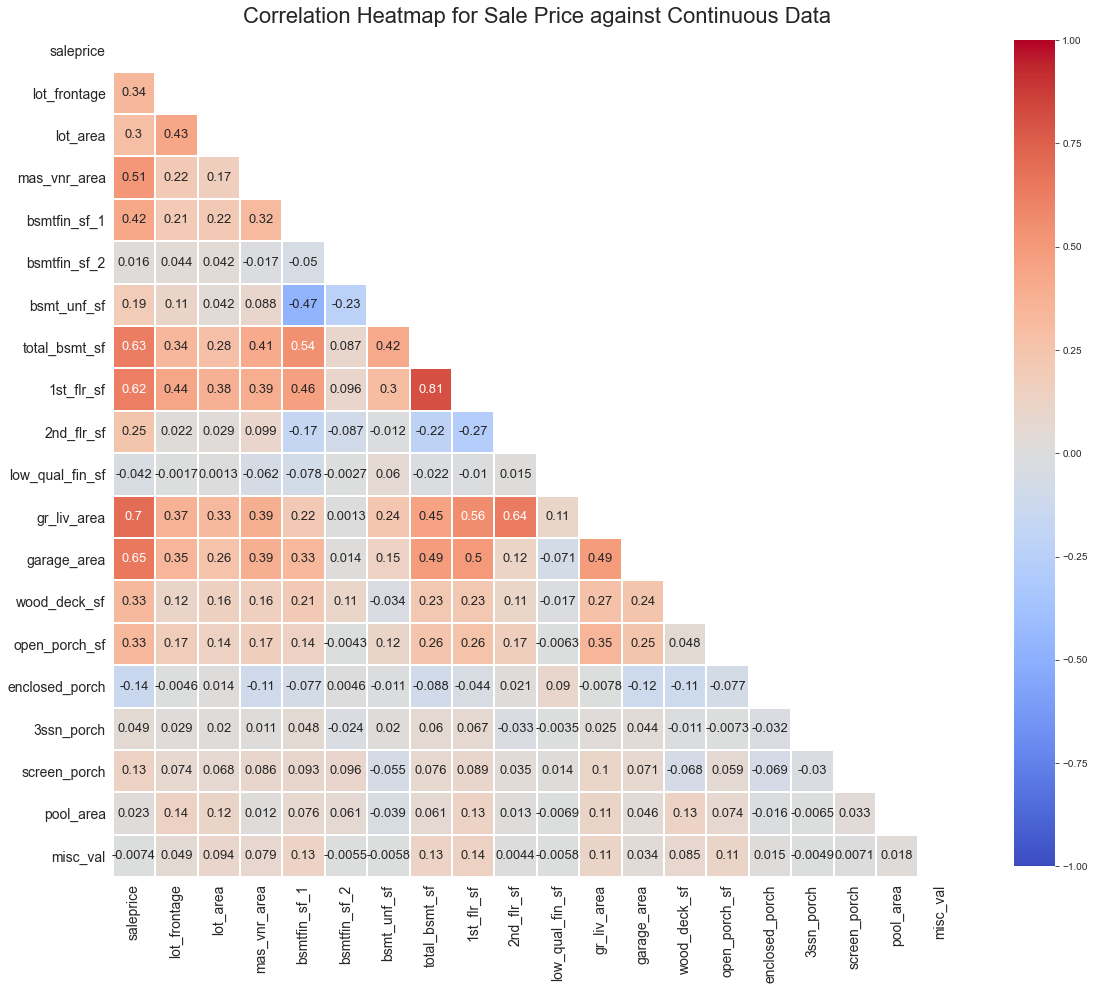

In [67]:
# use heatmap to show the correlation between saleprice and continunous data
fix, ax = plt.subplots(figsize=(19,19))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
                 square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
                 cbar_kws={"shrink": 0.8},fmt='.2g',center=0)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

ax.set_title('Correlation Heatmap for Sale Price against Continuous Data', fontsize=22);

### Correlation Observations

From the heatmap above, I have noticed there are 5 features have higher positive correlation with sale price, they are `gr_liv_area`(0.7), `garage_area`(0.65), `total_bsmt_sf`(0.63), `1st_flr_sf`(0.62) and `mas_vnr_area`(0.51) which means the increase of the any of the features will cause the increase of the `saleprice`, not the inverse direction.

But I will choose the `1st_flr_sf` as my features because it is part of the `gr_liv_area` which I will prove my point later.

For those continous data with correlation value less than 0.5, I will not use them for my `saleprice` prediction because they won't have much impact to the price prediction.

In [68]:
# create another data list which excluded 'saleprice'
cont_data1 = cont_data.copy()
cont_data1.remove('saleprice')

In [69]:
cont_data1

['lot_frontage',
 'lot_area',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val']

In [70]:
print(cont_data)

['saleprice', 'lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val']


In [71]:
# function for creating regression plot for numbers of data
def draw_regplots(dataframe, features, n_rows, n_cols):
    fig = plt.figure(figsize=(20,30))
    for i, var_name in enumerate(features):
        sns.set(font_scale=1.5)
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        sns.regplot(x=var_name, y='saleprice', data=train)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

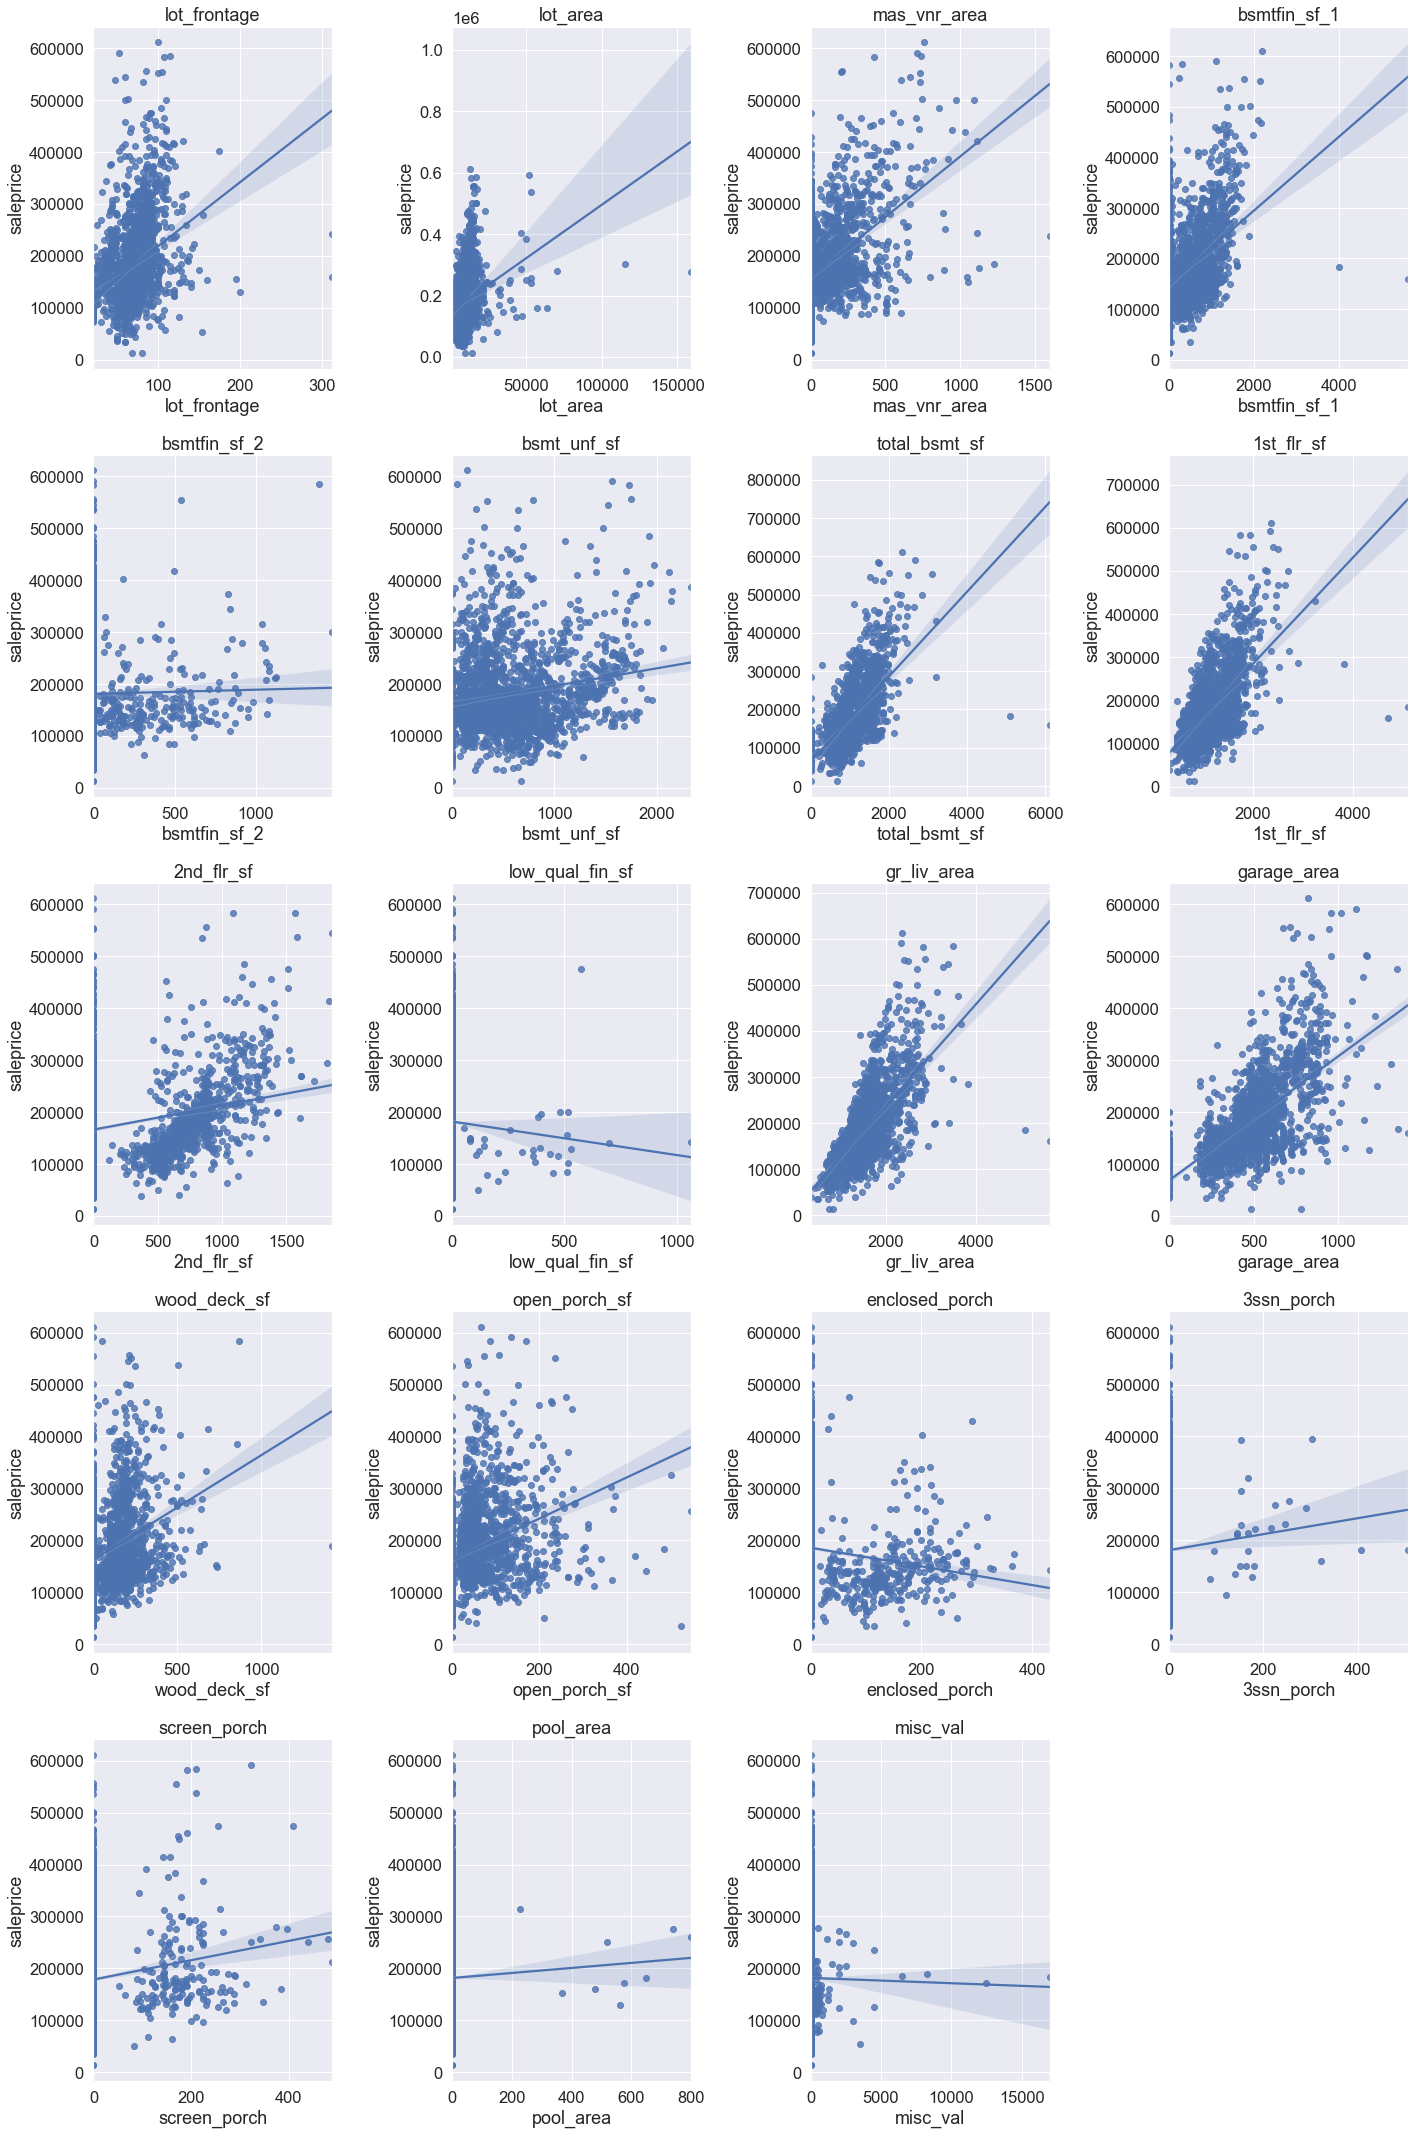

In [72]:
# Draw regression plots for the 'saleprice' versus individual continuous data
draw_regplots(train, cont_data1, int(len(cont_data1)/4)+1, 4)

### Scatter Plots Correlation Observations

From the scatter plots above, they show that the 4 features: `gr_liv_area`, `garage_area`, `total_bsmt_sf` and `mas_vnr_area` have positive correlation with `saleprice`, which proves the heatmap obervation. You can see from the plots that increasing of the 4 features will increase of the `saleprice`, not the inverse direction.

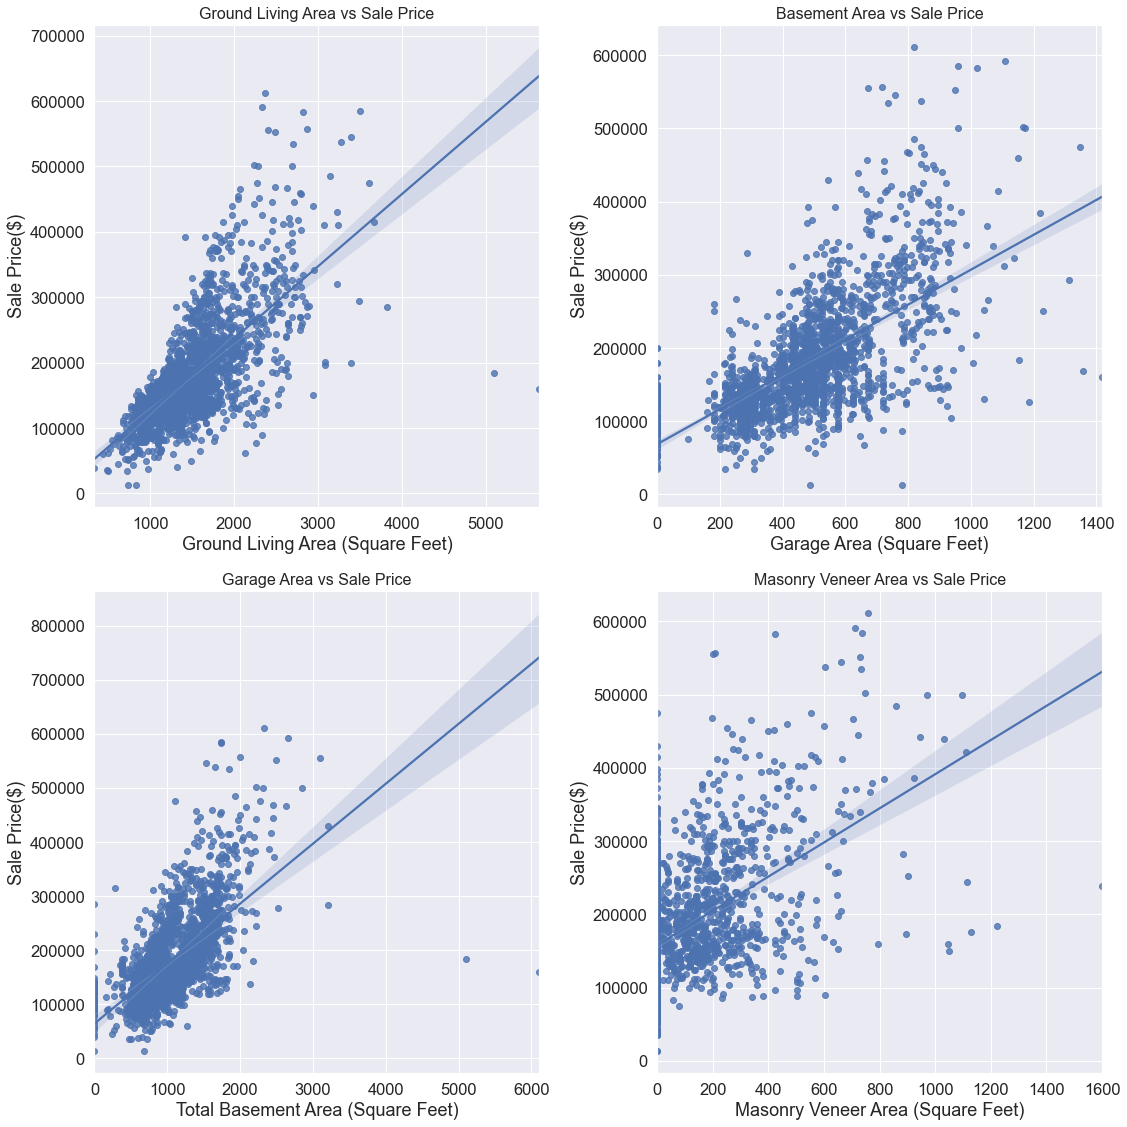

In [73]:
# show the distribution of the selected 4 features
f, axes = plt.subplots(2, 2, figsize=(16, 16))
sns.despine(left=True)

plt.subplot(221)
sns.regplot(x='gr_liv_area', y='saleprice', data=train)
plt.title("Ground Living Area vs Sale Price", fontsize=16)
plt.xlabel('Ground Living Area (Square Feet)')
plt.ylabel('Sale Price($)')

plt.subplot(222)
sns.regplot(x='garage_area', y='saleprice', data=train)
plt.title("Basement Area vs Sale Price", fontsize=16)
plt.xlabel('Garage Area (Square Feet)');
plt.ylabel('Sale Price($)')

plt.subplot(223)
sns.regplot(x='total_bsmt_sf', y='saleprice', data=train)
plt.title("Garage Area vs Sale Price", fontsize=16)
plt.xlabel('Total Basement Area (Square Feet)')
plt.ylabel('Sale Price($)')

plt.subplot(224)
sns.regplot(x='mas_vnr_area', y='saleprice', data=train)
plt.title("Masonry Veneer Area vs Sale Price", fontsize=16)
plt.xlabel('Masonry Veneer Area (Square Feet)')
plt.ylabel('Sale Price($)')

plt.tight_layout()

In [74]:
# Find the correlation between saleprice against the 4 features before removing the outliers
bef_drop = ['saleprice','mas_vnr_area','gr_liv_area','garage_area']
bef_corr = train[bef_drop].corr()['saleprice']
bef_corr_sort = bef_corr.sort_values(ascending=False)
bef_corr_sort

saleprice       1.000000
gr_liv_area     0.697038
garage_area     0.649897
mas_vnr_area    0.512654
Name: saleprice, dtype: float64

From the scatter plots above, you can see that `gr_liv_area`, `garage_area`, `total_bsmt_sf` and `mas_vnr_area` have a positive linear relationship with the `saleprice`.

From the `gr_liv_area` scatter plot, there are 2 outliers more then 4,000 square feet and they are farthest from the regression line appeared which I will drop it. This is because they can drastically change the fit estimations and predictions, distort statistical analyses and have impact on my predictive models.

In [75]:
# drop the Gr Liv Area > 4000, outliers
train.drop(train[train['gr_liv_area']>4000].index,inplace=True)

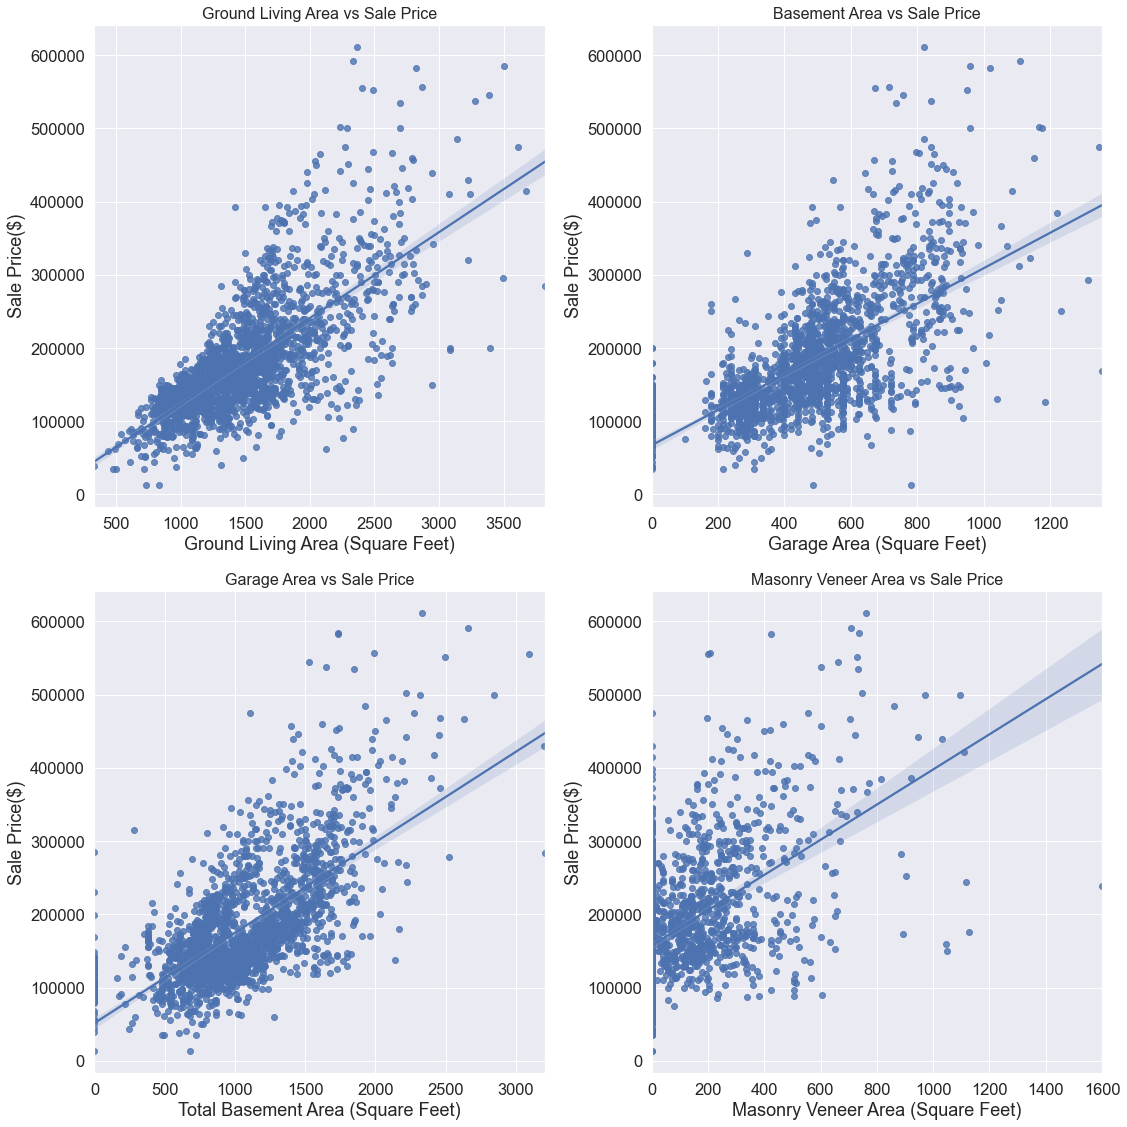

In [76]:
# study the distribution of the 'saleprice' histogram
f, axes = plt.subplots(2, 2, figsize=(16, 16))
sns.despine(left=True)

plt.subplot(221)
sns.regplot(x='gr_liv_area', y='saleprice', data=train)
plt.title("Ground Living Area vs Sale Price", fontsize=16)
plt.xlabel('Ground Living Area (Square Feet)')
plt.ylabel('Sale Price($)')

plt.subplot(222)
sns.regplot(x='garage_area', y='saleprice', data=train)
plt.title("Basement Area vs Sale Price", fontsize=16)
plt.xlabel('Garage Area (Square Feet)');
plt.ylabel('Sale Price($)')

plt.subplot(223)
sns.regplot(x='total_bsmt_sf', y='saleprice', data=train)
plt.title("Garage Area vs Sale Price", fontsize=16)
plt.xlabel('Total Basement Area (Square Feet)')
plt.ylabel('Sale Price($)')

plt.subplot(224)
sns.regplot(x='mas_vnr_area', y='saleprice', data=train)
plt.title("Masonry Veneer Area vs Sale Price", fontsize=16)
plt.xlabel('Masonry Veneer Area (Square Feet)')
plt.ylabel('Sale Price($)')

plt.tight_layout()

In [77]:
# Find the correlation between saleprice against the 4 features before removing the outliers
aft_drop = ['saleprice','mas_vnr_area','gr_liv_area','garage_area']
aft_corr = train[aft_drop].corr()['saleprice']
aft_corr_sort = aft_corr.sort_values(ascending=False)
aft_corr_sort

saleprice       1.000000
gr_liv_area     0.719463
garage_area     0.655097
mas_vnr_area    0.520463
Name: saleprice, dtype: float64

After I removed the outliers, the scatter plots have demonstrated the change in slop of the best fit line. Beside that, you can also see the increase of the correlation values from the table above compare to the correlation values before the outliers are removed.

Text(0, 0.5, 'Sale Price')

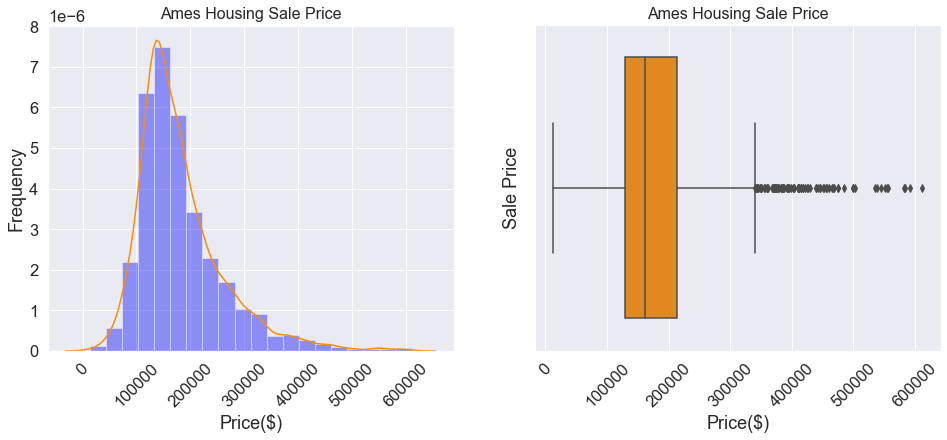

In [78]:
# study the distribution of the 'saleprice' histogram
f, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.despine(left=True)

plt.subplot(121)
sns.distplot(train['saleprice'], axlabel='Price($)', bins=20,color='blue',kde_kws={'color':'darkorange'})
plt.title("Ames Housing Sale Price", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Frequency')

plt.subplot(122)
sns.boxplot(train['saleprice'], color='darkorange');
plt.title("Ames Housing Sale Price", fontsize=16)
plt.xlabel('Price($)')
plt.xticks(rotation=45)
plt.ylabel('Sale Price')

Histogram above showed that the distribution of the `saleprice`. It is not normally distributed and right skewed.

From the boxplot, we can see that there are numbers of outlier after the maximum whisker which explained the right skewed of the histogram.

I will apply the log-transform to my `saleprice` because the highly right skewed distribution will lead to the chances of procuding errors may also be skewed negatively. Using the logarithm could improves the fit of the model by transforming the distribution to be more normally distributed.

In [79]:
# log-tranform the price to check the price distribution
log_price = np.log1p(train['saleprice'])

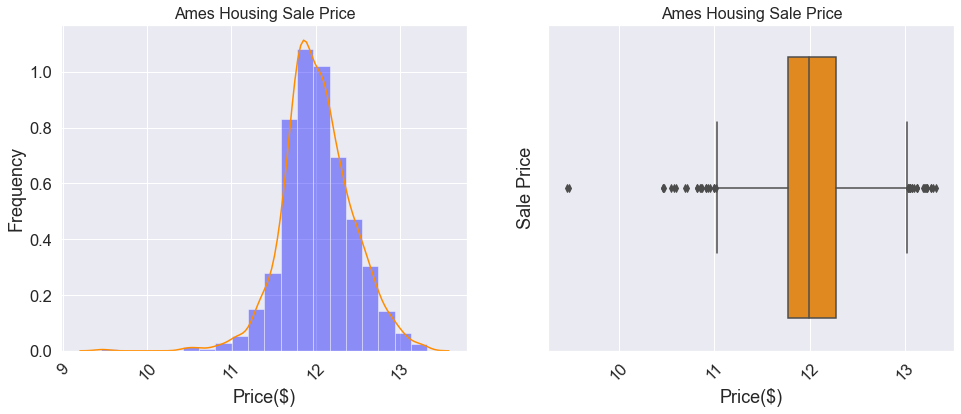

In [80]:
# study the distribution of the saleprice histogram
f, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.despine(left=True)

plt.subplot(121)
sns.distplot(log_price, axlabel='Price($)', bins=20,color='blue',kde_kws={'color':'darkorange'})
plt.title("Ames Housing Sale Price", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Frequency')

plt.subplot(122)
sns.boxplot(log_price, color='darkorange');
plt.title("Ames Housing Sale Price", fontsize=16)
plt.xlabel('Price($)')
plt.xticks(rotation=45)
plt.ylabel('Sale Price');

Histogram of the `saleprice` above is now looked almost normally distributed after the log-transformed.

The boxplot have outliers at both end which outside the minimum and maximum whiskers, there is hardly any sign of left or right skewed.

In [81]:
# find the relationship between total_bsmt_sf with others bsmt_sf
abv_grd_add = train['1st_flr_sf'] + train['2nd_flr_sf'] + train['low_qual_fin_sf']
pct_flr = ((train[train['gr_liv_area'] == abv_grd_add]['gr_liv_area'].count())/train['gr_liv_area'].count())*100
print('Percentage of similairty between year built and garage year built is {:.0f}%'.format(pct_flr))

Percentage of similairty between year built and garage year built is 100%


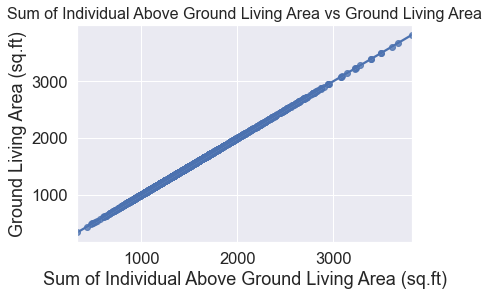

In [82]:
sns.regplot((train['1st_flr_sf'] + train['2nd_flr_sf'] + train['low_qual_fin_sf']), train['gr_liv_area'], data=train);
plt.title("Sum of Individual Above Ground Living Area vs Ground Living Area", fontsize=16)
plt.xlabel('Sum of Individual Above Ground Living Area (sq.ft)')
plt.ylabel('Ground Living Area (sq.ft)');

Comparison above shows that percentage of similarity between the sum of `1st_flr_sf`, `2nd_flr_sf` and `low_qual_fin_sf` versus `gr_liv_area` is 100%

Scatter plot also shows that `gr_liv_area` is highly positive correlation with the sum of sum of `1st_flr_sf`, `2nd_flr_sf` and `low_qual_fin_sf`. 

To avoid the multicollinearity, I will use __`gr_liv_area`__ for my prediction instead of `1st_flr_sf`, `2nd_flr_sf` and `low_qual_fin_sf` features.

In [83]:
# find the relationship between total_bsmt_sf with others bsmt_sf
bsmt_add = train['bsmtfin_sf_1'] + train['bsmtfin_sf_2'] + train['bsmt_unf_sf']
pct_bsmt = ((train[train['total_bsmt_sf'] == bsmt_add]['total_bsmt_sf'].count())/train['total_bsmt_sf'].count())*100
print('Percentage of similairty between year built and garage year built is {:.0f}%'.format(pct_bsmt))

Percentage of similairty between year built and garage year built is 100%


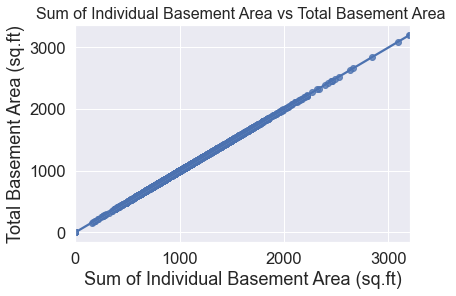

In [84]:
sns.regplot((train['bsmtfin_sf_1'] + train['bsmtfin_sf_2'] + train['bsmt_unf_sf']), train['total_bsmt_sf'], data=train);
plt.title("Sum of Individual Basement Area vs Total Basement Area ", fontsize=16)
plt.xlabel('Sum of Individual Basement Area (sq.ft)')
plt.ylabel('Total Basement Area (sq.ft)');

Comparison above shows that percentage of similarity between the sum of `bsmtfin_sf_1`, `bsmtfin_sf_2` and `bsmt_unf_sf` versus `total_bsmt_sf` is 100%.

Scatter plot also shows that `total_bsmt_sf` is highly positive correlation with the sum of `bsmtfin_sf_1`, `bsmtfin_sf_2` and `bsmt_unf_sf`.

To avoid the multicollinearity, I will use __`total_bsmt_sf`__ for my prediction instead of `bsmtfin_sf_1`, `bsmtfin_sf_2` and `bsmt_unf_sf` features.

__For the continuous data, I will choose `gr_liv_area` , `garage_area` and `total_bsmt_sf` as my features.__

### Discrete Data

In [85]:
# grouping the discrete data together
disc_data = ['saleprice','year_built','year_remod/add','bsmt_full_bath','bsmt_half_bath','full_bath',
             'half_bath','bedroom_abvgr','kitchen_abvgr','totrms_abvgrd','fireplaces','garage_yr_blt',
             'garage_cars','mo_sold','yr_sold']
corr = train[disc_data ].corr()

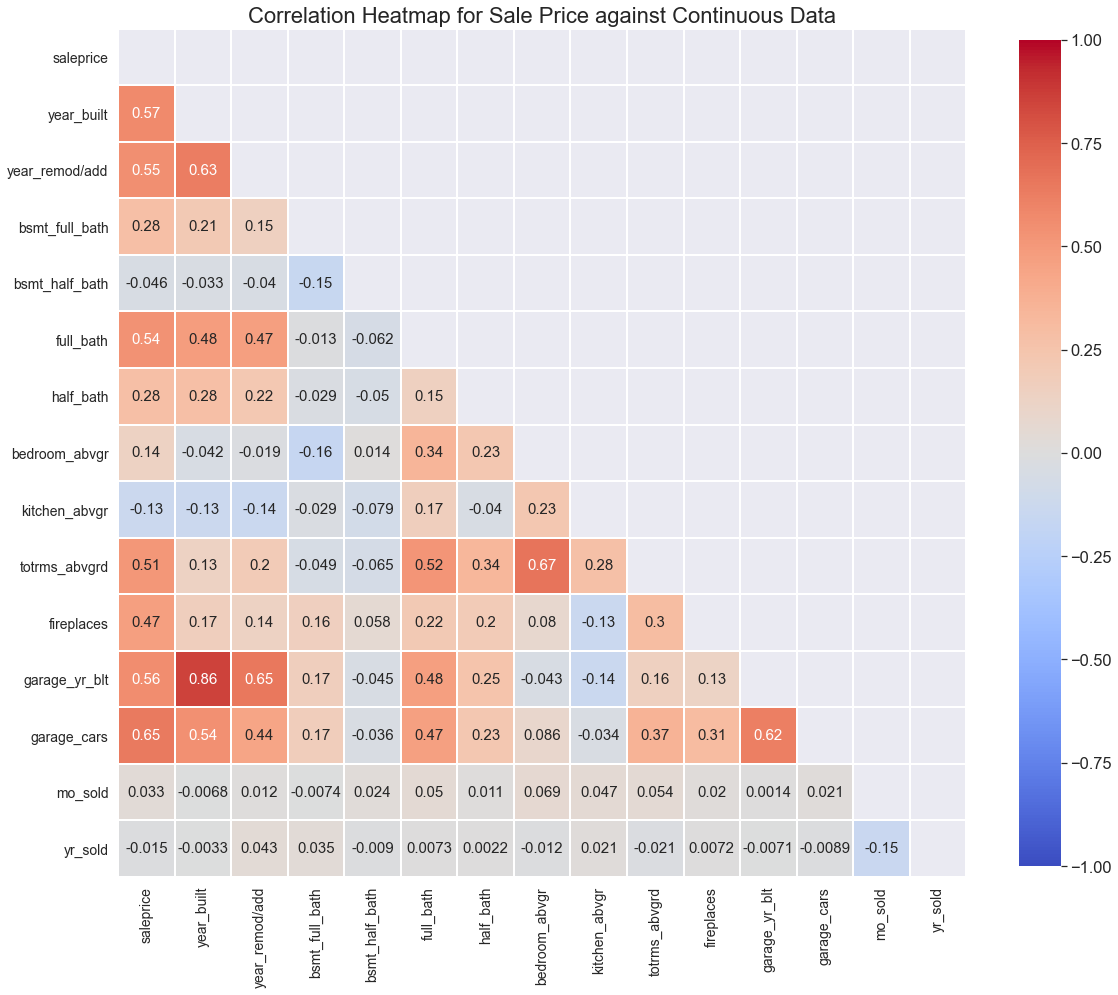

In [86]:
# use heatmap to show the correlation between saleprice and discrete data
fix, ax = plt.subplots(figsize=(19,19))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
                 square=True, linewidth=1,annot=True,annot_kws={'size':'15'},
                 cbar_kws={"shrink": 0.8},fmt='.2g',center=0)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

ax.set_title('Correlation Heatmap for Sale Price against Continuous Data', fontsize=22);

### Correlation Observations

From the heatmap above, I have noticed there are  features have higher positive correlation with sale price, they are `garage_cars`(0.65), `year_built`(0.57), `garage_yr_blt`(0.56), `year_remod/add`(0.55), `full_bath`(0.54) and `totrms_abvgrd`(0.51), which means the increase of the any of the features will cause the increase of the `saleprice`, not the inverse direction.

In [87]:
# create another data list which excluded 'saleprice'
disc_data1 = disc_data.copy()
disc_data1.remove('saleprice')

In [88]:
print(disc_data1)

['year_built', 'year_remod/add', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold']


In [89]:
print(disc_data)

['saleprice', 'year_built', 'year_remod/add', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold']


In [ ]:
# Draw regression plots for the 'saleprice' versus individual discrete data
draw_regplots(train, disc_data1, int(len(disc_data1)/3)+1, 3)

From the histograms above, you can see that `mo_sold` and `yr_sold` hardly have any correlation with `saleprice` while `kitchen_abvgr` and `bsmt_half_bath` has negative correlation with `saleprice`, so I might not consider these 4 features. However, the rest of the histograms do show the positive correlation with `saleprice` which I will apply them to my features engineering later.

In [ ]:
# define function to draw numbers of histogram
def draw_hists(dataframe, features, n_rows, n_cols, x, y):
    fig = plt.figure(figsize=(x,y))
    for i, var_name in enumerate(features):
        sns.set(font_scale=1.5)
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        plt.hist(x=var_name,data=dataframe, bins=20)
        plt.sca(ax)
        plt.xticks(rotation=70)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

In [ ]:
draw_hists(train, disc_data1, int(len(disc_data)/3)+1, 3, 15, 35)

From both histograms above,  you can see the frequency of the sub-features nder each feature.

I notice that there are some features have one value is heavily overpresented. If I apply this features into my prediction, the chances of the prediction of using the overpresented data point will be higher as well, which will not be good for my saleprice prediction. So, I will not use the features with frequency of one value more than 70% for my price prediction.

In [ ]:
train['kitchen_abvgr'].value_counts(normalize=True)

In [ ]:
train['bsmt_half_bath'].value_counts(normalize=True)

Since the frequency of `kitchen_abvgr` and `bsmt_half_bath` is more than 90%, I will not consider both of them for my analysis.

In [ ]:
# percentage similarity between 'year_built' and 'garage_yr_blt'
pct_yr = ((train[train['garage_yr_blt'] == train['year_built']]['year_built'].count())/train['year_built'].count())*100
print('Percentage of similairty between year built and garage year built is {:.2f}%'.format(pct_yr))

In [ ]:
sns.regplot(train['garage_yr_blt'], train['year_built'], data=train);
plt.title("Sum of Individual Basement Area vs Total Basement Area ", fontsize=16)
plt.xlabel('Sum of Individual Basement Area (sq.ft)')
plt.ylabel('Total Basement Area (sq.ft)');

Comparison above shows that percentage of similarity between `year_built` versus `garage_yr_blt` is 81.84%

Scatter plot also shows that both of them are highly positive correlation.

To avoid the multicollinearity, I will use __`year_built`__ for my prediction instead of `garage_yr_blt` features because the heatmap shows that the correlation between `saleprice` versus `year_built` is higher than `saleprice` versus `garage_yr_blt`

In [ ]:
rms_corr = train[['bedroom_abvgr','totrms_abvgrd']].corr()['totrms_abvgrd'].sort_values(ascending=False)
rms_corr

Correlation table and heatmap above show that `totrms_abvgrd` and `bedroom_abvgr` have 0.665 correlation value. 

To avoid the multicollinearity, I will use __`totrms_abvgrd`__ for my prediction beacuse it has higher correlation with `saleprice` instead of `bedroom_abvgr`.

__For the discrete data, I will select `year_built`, `year_remod/add`, `yr_sold`, `bsmt_full_bath` , `full_bath`, `half_bath`, `totrms_abvgrd`, `fireplaces` and `garage_cars` features for my `saleprice` predictions.__

### Categorical Data

In [ ]:
# grouping the categoricl data together
cat_data = train.select_dtypes(include=[object]).columns.tolist()
print(cat_data)

In [ ]:
cat_data1 = cat_data.copy()
cat_data1.remove('pid')

In [ ]:
# draw the histograms to find the frequency of each categorical data
draw_hists(train, cat_data1, int(len(cat_data)/2)+1, 2, 20, 160)

In [ ]:
# find counts of unique rows in percentage for each categorical data
for f in cat_data1:
    print('------------------------------------\n')
    print('{} counts of unique rows in percentage:'.format(f))
    print((train[f].value_counts(normalize=True)*100).round(2))

From both histograms and tables above,  you can see the frequency of the sub-features and in percentage under each feature.

I noticee that there are plenty of features have one value is heavily overpresented. If I apply this features into my prediction, the chances of the prediction of using the overpresented data point will be higher as well, which will not good for my saleprice prediction. So, I will not use the features with frequency of one value more than 70% for my price prediction.

The features for my further reasearch are `'ms_subclass', 'lot_shape', 'neighborhood', 'overall_qual', 'overall_cond', 'house_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'foundation', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1', 'heating_qc', 'kitchen_qual', 'fireplace_qu', 'garage_type' and 'garage_finish'`.

In [ ]:
train['saleprice'].mean()

In [ ]:
train['exterior_1st'].unique()

In [ ]:
cat_updt = train[['ms_subclass','lot_shape','neighborhood','overall_qual','overall_cond',
                  'house_style','exterior_1st','exterior_2nd','mas_vnr_type','exter_qual',
                  'foundation','bsmt_qual','bsmt_exposure','bsmtfin_type_1','heating_qc',
                  'kitchen_qual','fireplace_qu', 'garage_type','garage_finish']]

In [ ]:
def cat_plotter(x_fea, y_fea, data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    
    sns.countplot(x=x_fea, data=data, ax=ax1, order=data[x_fea].value_counts().index)
    ax1.set_title('Histogram of features', fontsize = 16)
    ax1.set_xlabel(x_fea, fontsize=16)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
    ax1.set_ylabel('Frequency count', fontsize=16)
    
    sns.boxplot(x=x_fea, y=y_fea, data=cat_updt, ax=ax2)
    ax2.set_title('Boxplot of features', fontsize = 16)
    ax2.set_xlabel(x_fea, fontsize=16)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
    ax2.set_ylabel('Saleprice', fontsize=16)
    ax2.axhline(181479, ls='--', color='r')
    fig.tight_layout()
    plt.show()

In [ ]:
for c in cat_updt.columns:
    cat_plotter(c,train['saleprice'], cat_updt)

Histograms above shows the frequency of sub-features of each features and the boxplots shows the distribution of the sub-features against `saleprice`.

For `lot_shape` feature's boxplot, you can see that the median `saleprice` of the sub-features don't have a huge difference between each other. So I will not use this feature for my prediction.

__For the discrete data, I will select `ms_subclass`, `neighborhood`, `exterior_1st`, `exterior_2nd` , `mas_vnr_type`, `foundation`, `garage_type`, `garage_finish`, `fireplace_qu`, `kitchen_qual`, `heating_qc`, `bsmtfin_type_1`, `bsmt_qual` and `exter_qual` features for my `saleprice` predictions.__

## Train Data Features Engineering

In [ ]:
# create dummies columns list
dummy_cols = ['house_style','ms_subclass','neighborhood','lot_shape','bsmt_exposure','exterior_1st',
              'exterior_2nd','mas_vnr_type','foundation']
dummy = train # create dummy dataframe so that it won't alter my train dataframe

In [ ]:
# function to create dummies
def dummy_generator(dataframe, cols):
    dataframe = pd.get_dummies(dataframe, columns=cols, drop_first=False) 
    return dataframe

In [ ]:
# create dummies for dummy dataframe
dummy_df = dummy_generator(dummy, dummy_cols)

In [ ]:
# check the dummy dataframe
dummy_df.head()

In [ ]:
# find the correlation between individual neighborhood with the saleprice
dummy_df[['saleprice','neighborhood_Blmngtn','neighborhood_Blueste','neighborhood_BrDale',
          'neighborhood_BrkSide','neighborhood_ClearCr','neighborhood_CollgCr','neighborhood_Crawfor',
          'neighborhood_Edwards','neighborhood_Gilbert','neighborhood_Greens','neighborhood_GrnHill',
          'neighborhood_IDOTRR','neighborhood_Landmrk','neighborhood_MeadowV','neighborhood_Mitchel',
          'neighborhood_NAmes','neighborhood_NPkVill','neighborhood_NWAmes','neighborhood_NoRidge',
          'neighborhood_NridgHt','neighborhood_OldTown','neighborhood_SWISU','neighborhood_Sawyer',
          'neighborhood_SawyerW','neighborhood_Somerst','neighborhood_StoneBr','neighborhood_Timber',
          'neighborhood_Veenker']].corr()['saleprice'].sort_values(ascending=False)

In [ ]:
# find the correlation between individual exterior_1st with the saleprice
dummy_df[['saleprice','exterior_1st_AsbShng','exterior_1st_AsphShn','exterior_1st_BrkComm',
          'exterior_1st_BrkFace','exterior_1st_CBlock','exterior_1st_CemntBd','exterior_1st_HdBoard',
          'exterior_1st_ImStucc','exterior_1st_MetalSd','exterior_1st_Plywood','exterior_1st_Stone',
          'exterior_1st_Stucco','exterior_1st_VinylSd','exterior_1st_Wd Sdng',
          'exterior_1st_WdShing']].corr()['saleprice'].sort_values(ascending=False)

In [ ]:
# find the correlation between individual exterior_2nd with the saleprice
dummy_df[['saleprice','exterior_2nd_AsbShng','exterior_2nd_AsphShn','exterior_2nd_Brk Cmn',
          'exterior_2nd_BrkFace','exterior_2nd_CBlock','exterior_2nd_CmentBd','exterior_2nd_HdBoard',
          'exterior_2nd_ImStucc','exterior_2nd_MetalSd','exterior_2nd_Plywood','exterior_2nd_Stone',
          'exterior_2nd_Stucco','exterior_2nd_VinylSd','exterior_2nd_Wd Sdng',
          'exterior_2nd_Wd Shng']].corr()['saleprice'].sort_values(ascending=False)

In [ ]:
# find the correlation between individual foundation with the saleprice
dummy_df[['saleprice','foundation_BrkTil','foundation_CBlock','foundation_PConc','foundation_Slab',
          'foundation_Stone','foundation_Wood']].corr()['saleprice'].sort_values(ascending=False)

In [ ]:
# find the correlation between individual mas_vnr_type with the saleprice
dummy_df[['saleprice','mas_vnr_type_BrkCmn','mas_vnr_type_BrkFace','mas_vnr_type_None',
          'mas_vnr_type_Stone']].corr()['saleprice'].sort_values(ascending=False)

In [ ]:
# categorized the neighborhood's string data into 4 groups of integer data
# so I can incorporate these features in my feature engineering.
train = train.replace(
        {'neighborhood':{'Sawyer':1,'SawyerW':3,'NAmes':1,'Timber':4,'Edwards':1,'OldTown':1,
                         'BrDale':2,'CollgCr':4,'Somerst':4,'Mitchel':2,'StoneBr':4,'NridgHt':4,
                         'Gilbert':3,'Crawfor':3,'IDOTRR':1,'NWAmes':3,'Veenker':4,'MeadowV':1,
                         'SWISU':2,'NoRidge':4,'ClearCr':3,'Blmngtn':3,'BrkSide':1,'NPkVill':2,
                         'Blueste':2,'GrnHill':3,'Greens':3,'Landmrk':2}})

For the 'neighborhood' feature, I will categorise them into 4 groups based on the correlation between the individual neighborhood with the `saleprice`:
- 4 - neighborhood above 0.08 (Timber, CollgCr, Somerst, StoneBr, NridgHt, Veenker, NoRidge)
- 3 - neighborhood between 0 and 0.06 (SawyerW, Gilbert, Crawfor, NWAmes, ClearCr, Blmngtn, GrnHill, Greens) 
- 2 - neighborhood between -0.1 and 0 (BrDale, Mitchel, SWISU, NPkVill, Blueste, Landmrk)
- 1 - neighborhood below -0.1 (Sawyer, NAmes, Edwards, OldTown, IDOTRR, MeadowV, BrkSide)

In [ ]:
plt.figure(figsize=(20,12))

color_dict = dict({4:'blue', 3:'green', 2:'red', 1:'grey'})
sns.scatterplot(data=train,x='gr_liv_area',y='saleprice',hue='neighborhood', palette=color_dict)

plt.title('Sale Price vs Ground Living Area',fontsize=25)
plt.xlabel('Ground Total Area',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15);

From the scatterplot, the `saleprice` has the positive correlation with `gr_liv_area`. You can see that category 4 of the neighborhoods have the highest `saleprice`.

In [ ]:
# categorized the exterior 1st, exterior 2nd, foundation and mas_vnr_type into 2 groups
# positive correlation into group 2 and negavite into group 1
# so I can incorporate these features in my feature engineering.
train = train.replace(
        {'exterior_1st':{'VinylSd':2,'CemntBd':2,'Stone':2,'BrkFace':2,'ImStucc':2,'BrkComm':1,
                         'AsphShn':1,'CBlock':1,'Plywood':1,'WdShing':1,'Stucco':1,'HdBoard':1,
                         'AsbShng':1,'MetalSd':1,'Wd Sdng':1,'Other':1,'PreCast':1},
         'exterior_2nd':{'VinylSd':2,'CmentBd':2,'BrkFace':2,'ImStucc':2,'Stone':1,'Brk Cmn':1,
                         'AsphShn':1,'CBlock':1,'Plywood':1,'Wd Sdng':1,'Stucco':1,'HdBoard':1,
                         'AsbShng':1,'MetalSd':1,'Wd Shng':1,'Other':1,'PreCast':1},
         'foundation':{'PConc':2,'Wood':1,'Stone':1,'Slab':1,'BrkTil':1,'CBlock':1},
         'mas_vnr_type':{'Stone':2,'BrkFace':2,'BrkCmn':1,'None':1,'CBlock':1}})

In [ ]:
# turn the following features' string data to integer data
# so I can incorporate these features in my feature engineering.
train = train.replace(
        {'exter_qual': {'Ex':5,'Gd':4,'TA':3,'Fa':3,'Po':1},
         'bsmt_qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':1},
         'heating_qc': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
         'kitchen_qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
         'fireplace_qu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':1},
         'bsmtfin_type_1': {'GLQ':5,'ALQ':4,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1,'NA':1},
         'bsmt_exposure': {'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1},
         'garage_type': {'2Types':7,'Attchd':6,'Basment':5,'BuiltIn':4,'CarPort':3,'Detchd':2,'NA':1},
         'garage_finish': {'Fin':4,'RFn':3,'Unf':2,'NA':1},
         'house_style':{'2Story':4,'1Story':1,'1.5Fin':3,'SFoyer':7,'SLvl':8,'2.5Unf':5,'2.5Fin':6,'1.5Unf':2}})

In [ ]:
# turn the following features' string data to integer data
# so I can incorporate these features in my feature engineering.
train['overall_qual'] = train['overall_qual'].astype(int)
train['overall_cond'] = train['overall_cond'].astype(int)

In [ ]:
# new material features
train['material'] = train['exterior_1st'] * train['exterior_2nd'] * train['foundation'] * train['mas_vnr_type']

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train,x='material',y='saleprice')
plt.title('Sale Price vs Material Used',fontsize=15)
plt.xlabel('Material',fontsize=15)
plt.ylabel('Sale Price',fontsize=15);

For the new `material` feature, I have applied the polynomial features method to combine the `exterior_1st`, `exterior_2nd`, `foundation` and `mas_vnr_type` features. All these features are related to the materials'used for the construction. I have divided the sub-features into 1(negative colleration with the `saleprice`) and 2(positive colleration with the `saleprice`).

From the boxplot, you can see that incresing of the `material` value will increase the `saleprice` which is good.

In [ ]:
# new overall feature
train['overall'] = train['overall_qual'] * train['overall_cond']

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train,x='overall',y='saleprice')

plt.title('Sale Price vs Overall House Rating',fontsize=25)
plt.xlabel('Overall House Rating',fontsize=15)
plt.ylabel('Sale Price',fontsize=15);

For the new `overall` feature, I have applied the polynomial features method to combine the `overall_qual` and `overall_cond`. These 2 features are the overall rating of the house in term of materials used, finishing and condition of the house. The sub-features are based on the existing pointing system.

From the boxplot, you can see that incresing of the `overall` value will increase the `saleprice` which is good.

In [ ]:
# new quality feature 
train['quality'] = train['exter_qual'] * train['bsmt_qual'] * train['heating_qc'] * train['kitchen_qual'] * train['fireplace_qu'] * train['bsmtfin_type_1'] * train['bsmt_exposure']

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(data=train,x='quality',y='saleprice')

plt.title('Sale Price vs Quality Rating of the House',fontsize=25)
plt.xlabel('Quality Rating of the House',fontsize=15)
plt.ylabel('Sale Price',fontsize=15);

For the new `quality` feature, I have applied the polynomial features method to combine the `exter_qual`, `bsmt_qual`, `heating_qc`, `kitchen_qual`, `fireplace_qu`, `bsmtfin_type_1` and `bsmt_exposure` features. All these features are related to the quality rating of the house. The sub-features' pointing system are standardized range from 1(Poor) to 5(excellent).

From the scatterplot, you can see that incresing of the `quality` value will increase the `saleprice` although it is not very because lots of the `quality` value gather around the lower end, still it is good for prediction.

In [ ]:
# new overall_age feature
# both age is correla
train['house_age'] = train['yr_sold'] - train['year_built']
train['remod_age'] = train['yr_sold'] - train['year_remod/add']
train['overall_age'] = train['house_age'] * train['remod_age']

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(data=train,x='overall_age',y='saleprice')

plt.title('Sale Price vs Age of the House',fontsize=25)
plt.xlabel('Age of the House',fontsize=15)
plt.ylabel('Sale Price',fontsize=15);

For the new `overall_age` feature, I have applied the polynomial features method to combine the `house_age` and `remod_age` features. All these features are related to age of the house with/ or without remodelling.

From the scatterplot, you can see that incresing of the `overall_age` value will decrease the `saleprice` which is expected.

In [ ]:
# new garage feature
train['house_garage'] = train['garage_type'] * train['garage_finish'] * train['house_style']

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(data=train,x='house_garage',y='saleprice')

plt.title('Sale Price vs House & Garage Style and Finishing Rating',fontsize=25)
plt.xlabel('Garage Style and Finishing Rating',fontsize=15)
plt.ylabel('Sale Price',fontsize=15);

For the new `house_garage` feature, I have applied the polynomial features method to combine the `garage_type`, `garage_finish` and `house_style` features. All these features are related to the style and finishing for both house and garage.

From the scatterplot, you can see that incresing of the `house_garage` value will increase the `saleprice` which is good.

In [ ]:
# new all_bath feature
train['all_bath'] = train['full_bath'] + train['bsmt_full_bath'] + (train['half_bath'] * 0.5) 

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(data=train,x='all_bath',y='saleprice')

plt.title('Sale Price vs Combine of Half Bath and Full Bath',fontsize=25)
plt.xlabel('Combine of Half Bath and Full Bath',fontsize=15)
plt.ylabel('Sale Price',fontsize=15);

For the new `all_bath` feature, I have applied the polynomial features method to combine the `full_bath`, `bsmt_full_bath` and `half_bath` features. All these features are related to the number of full and half bath within a house.

From the scatterplot, you can see that incresing of the `all_bath` value will increase the `saleprice` which is good.

The reason I create new features by grouping the various features together because they shared the common characteristic and can help to improve my prediction for the `saleprice`.

## Test Data Features Engineering

In [ ]:
# categorized the neighborhood's string data into 4 groups of integer data
# so I can incorporate these features in my feature engineering.
test = test.replace(
        {'neighborhood':{'Sawyer':1,'SawyerW':3,'NAmes':1,'Timber':4,'Edwards':1,'OldTown':1,
                         'BrDale':2,'CollgCr':4,'Somerst':4,'Mitchel':2,'StoneBr':4,'NridgHt':4,
                         'Gilbert':3,'Crawfor':3,'IDOTRR':1,'NWAmes':3,'Veenker':4,'MeadowV':1,
                         'SWISU':2,'NoRidge':4,'ClearCr':3,'Blmngtn':3,'BrkSide':1,'NPkVill':2,
                         'Blueste':2,'GrnHill':3,'Greens':3,'Landmrk':2}})

In [ ]:
train['exterior_2nd'].unique()

In [ ]:
# categorized the exterior 1st, exterior 2nd, foundation and mas_vnr_type into 2 groups
# positive correlation into group 2 and negavite into group 1
test = test.replace(
        {'exterior_1st':{'VinylSd':2,'CemntBd':2,'Stone':2,'BrkFace':2,'ImStucc':2,'BrkComm':1,
                         'AsphShn':1,'CBlock':1,'Plywood':1,'WdShing':1,'Stucco':1,'HdBoard':1,
                         'AsbShng':1,'MetalSd':1,'Wd Sdng':1,'Other':1,'PreCast':1},
         'exterior_2nd':{'VinylSd':2,'CmentBd':2,'BrkFace':2,'ImStucc':2,'Stone':1,'Brk Cmn':1,
                         'AsphShn':1,'CBlock':1,'Plywood':1,'Wd Sdng':1,'Stucco':1,'HdBoard':1,
                         'AsbShng':1,'MetalSd':1,'Wd Shng':1,'Other':1,'PreCast':1},
         'foundation':{'PConc':2,'Wood':1,'Stone':1,'Slab':1,'BrkTil':1,'CBlock':1},
         'mas_vnr_type':{'Stone':2,'BrkFace':2,'BrkCmn':1,'None':1,'CBlock':1}})

In [ ]:
# turn the following features' string data to integer data
# so I can incorporate these features in my feature engineering.
test = test.replace(
        {'exter_qual': {'Ex':5,'Gd':4,'TA':3,'Fa':3,'Po':1},
         'bsmt_qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':1},
         'heating_qc': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
         'kitchen_qual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
         'fireplace_qu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':1},
         'bsmtfin_type_1': {'GLQ':5,'ALQ':4,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1,'NA':1},
         'bsmt_exposure': {'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1},
         'garage_type': {'2Types':7,'Attchd':6,'Basment':5,'BuiltIn':4,'CarPort':3,'Detchd':2,'NA':1},
         'garage_finish': {'Fin':4,'RFn':3,'Unf':2,'NA':1},
         'house_style':{'2Story':4,'1Story':1,'1.5Fin':3,'SFoyer':7,'SLvl':8,'2.5Unf':5,'2.5Fin':6,'1.5Unf':2}})

In [ ]:
# turn the following features' string data to integer data
# so I can incorporate these features in my feature engineering.
test['overall_qual'] = test['overall_qual'].astype(int)
test['overall_cond'] = test['overall_cond'].astype(int)

In [ ]:
# new material features
test['material'] = test['exterior_1st'] * test['exterior_2nd'] * test['foundation'] * test['mas_vnr_type']

In [ ]:
# new overall feature
test['overall'] = test['overall_qual'] * test['overall_cond']

In [ ]:
# new quality feature
test['quality'] = test['exter_qual'] * test['bsmt_qual'] * test['heating_qc'] * test['kitchen_qual'] * test['fireplace_qu'] * test['bsmtfin_type_1'] * test['bsmt_exposure']

In [ ]:
# new overall_age feature
test['house_age'] = test['yr_sold'] - test['year_built']
test['remod_age'] = test['yr_sold'] - test['year_remod/add']
test['overall_age'] = test['house_age'] * test['remod_age']

In [ ]:
# new garage feature
test['house_garage'] = test['garage_type'] * test['garage_finish'] * test['house_style']

In [ ]:
# new all_bath feature
test['all_bath'] = test['full_bath'] + test['bsmt_full_bath'] + (test['half_bath'] * 0.5) 

## Train Data Linear Model Selection and Regularization

In [ ]:
# select features
train_new = train[['id','neighborhood','overall','quality','overall_age','house_garage','total_bsmt_sf',
                   'gr_liv_area','garage_area','garage_cars','all_bath','mas_vnr_area',
                   'totrms_abvgrd','ms_subclass','saleprice','material']]

In [ ]:
train_new = pd.get_dummies(data=train_new, columns=['ms_subclass'], drop_first=True)

In [ ]:
train_new.head()

In [ ]:
train_new.shape

In [ ]:
X = train_new.drop(columns=['saleprice','id']) # independent variable
y = np.log1p(train_new['saleprice']) # dependent variable

For the target variable, I have applied the log-transform because my histogram showed a highly right skewed distribution and the chances of procuding errors may also be skewed negatively. Using the logarithm could improves the fit of the model by transforming the distribution to be more normally distributed.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# standardizing the input data
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

Standardization is necessary for regularized regression because the beta values for each predictor variable must be on the same scale. If betas are different sizes just because of the scale of predictor variables the regularization term can't determine which betas are more/less important based on their size.

### Apply Linear Regression to Train-Test-Split's Data

In [ ]:
# fit Linear Regression into X and y train data 
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# find the accuracy, R2
lr_train_scores = lr.score(X_train_scaled, y_train)
lr_test_scores = lr.score(X_test_scaled, y_test)
lr_cv_scores = (cross_val_score(lr, X_train_scaled, y_train, cv=5)).mean()

# find the MSE
lr_train_mse_scores = mean_squared_error(np.expm1(y_train), np.expm1(lr.predict(X_train_scaled)))
lr_test_mse_scores = mean_squared_error(np.expm1(y_test), np.expm1(lr.predict(X_test_scaled)))
lr_cv_mse_scores = (-cross_val_score(lr, X_train_scaled, np.expm1(y_train), cv=5,
                                     scoring='neg_mean_squared_error')).mean()
# find the RMSE - squared root of the average of the average of the squared errors
# the difference between each prediction and the actual values of the saleprice.
lr_train_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y_train),
                                                  np.expm1(lr.predict(X_train_scaled))))
lr_test_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y_test),
                                                 np.expm1(lr.predict(X_test_scaled))))
lr_cv_rmse_scores = -cross_val_score(lr, X_train_scaled, np.expm1(y_train), cv=5,
                                     scoring='neg_root_mean_squared_error').mean()

print('Linear Regression results')
print('---------------------------------------')
print('Acronym: R2   - R Squared\n', 
      '        CV   - Cross-Validation\n',
      '        MSE  - Mean Squared Error\n',
      '        RMSE - Root Mean Squared Error')
print('----------------------------------------')
print('Train Data R2        : %.4f' % lr_train_scores)
print('Test Data R2         : %.4f' % lr_test_scores)
print('Cross-validation R2  : %.4f' % lr_cv_scores)
print('Train Data MSE       : %.4f' % lr_train_mse_scores)
print('Test MSE             : %.4f' % lr_test_mse_scores)
print('Cross-validation MSE : %.4f' % lr_cv_mse_scores)
print('Train RMSE           : %.4f' % lr_train_rmse_scores)
print('Test RMSE            : %.4f' % lr_test_rmse_scores)
print('Cross-validation RMSE: %.4f' % lr_cv_rmse_scores)

Linear regression model performed quite well, with only a 1.4% difference in $R^2$ between train and test scores. The average of our cross-validated scores was strong as well ($R^2$ = 88%).

In [ ]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(lr.predict(X_train_scaled), y_train, s=5, color='darkorange', alpha = 0.5)

# Plot a line.
plt.plot([10.5, np.max(y_train)], [10.5, np.max(y_train)], color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Sale Price: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Sale Price: $y$", fontsize = 20)
plt.title('Predicted Sale Price vs. Actual Sale Price', fontsize = 24);

From the plot above, you can see that most of the points are fell on the diagonal line. it tells us that it would have a perfect fit.

In [ ]:
# create the list of coefficient of each feature
selected_df = pd.DataFrame(X.columns, columns=['feature'])
selected_df['LR_Coef'] = lr.coef_
selected_df.head(30)

Based on the list above, it doesn't occur to me that the coefficients value are wildly overblown.

### Apply Lasso Regression to Train-Test-Split's Data

The L1 penalty can be used for feature selection as it 'zeroes out'uninformative coefficients, effectively reducting the overall features space and retaining only strongly informative variables.

In [ ]:
# find optimal alpha
optimal_lasso = LassoCV(n_alphas=500, cv=5)
optimal_lasso.fit(X_train_scaled, y_train)
optimal_lasso_alpha = optimal_lasso.alpha_

# fit Lasso with optimal alpha into X and y train data 
lasso = Lasso(alpha=optimal_lasso_alpha)
lasso.fit(X_train_scaled, y_train)

# find the accuracy, R2
lasso_train_scores = lasso.score(X_train_scaled, y_train)
lasso_test_scores = lasso.score(X_test_scaled, y_test)
lasso_cv_scores = (cross_val_score(lasso, X_train_scaled, y_train, cv=5)).mean()

# find the MSE
lasso_train_mse_scores = mean_squared_error(np.expm1(y_train), np.expm1(lasso.predict(X_train_scaled)))
lasso_test_mse_scores = mean_squared_error(np.expm1(y_test), np.expm1(lasso.predict(X_test_scaled)))
lasso_cv_mse_scores = (-cross_val_score(lasso, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_mean_squared_error')).mean()
# find the RMSE
lasso_train_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y_train),
                                                     np.expm1(lasso.predict(X_train_scaled))))
lasso_test_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y_test),
                                                    np.expm1(lasso.predict(X_test_scaled))))
lasso_cv_rmse_scores = -cross_val_score(lasso, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_root_mean_squared_error').mean()

print('Lasso Regression results')
print('---------------------------------------')
print('Acronym: R2   - R Squared\n', 
      '        CV   - Cross-Validation\n',
      '        MSE  - Mean Squared Error\n',
      '        RMSE - Root Mean Squared Error')
print('----------------------------------------')
print('Optimal alpha : %.4f' % optimal_lasso_alpha)
print('Train R2      : %.4f' % lasso_train_scores)
print('Test R2       : %.4f' % lasso_test_scores)
print('CV R2         : %.4f' % lasso_cv_scores)
print('Train MSE     : %.4f' % lasso_train_mse_scores)
print('Test MSE      : %.4f' % lasso_test_mse_scores)
print('CV MSE        : %.4f' % lasso_cv_mse_scores)
print('Train RMSE    : %.4f' % lasso_train_rmse_scores)
print('Test RMSE     : %.4f' % lasso_test_rmse_scores)
print('CV RMSE       : %.4f' % lasso_cv_rmse_scores)

Lasso regression model performed quite well, with only a 1.5% difference in $R^2$ between train and test scores. The average of the cross-validated scores was strong as well ($R^2$ = 88%).

In [ ]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(lasso.predict(X_train_scaled), y_train, s=5, color='darkorange', alpha = 0.5)

# Plot a line.
plt.plot([10.5, np.max(y_train)], [10.5, np.max(y_train)], color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Sale Price: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Sale Price: $y$", fontsize = 20)
plt.title('Predicted Sale Price vs. Actual Sale Price', fontsize = 24);

From the plot above, you can see that most of the points are fell on the diagonal line. it tells us that it would have a perfect fit.

In [ ]:
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(30)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

From the Lasso regression bar chart and the coefficient results above, you can see that the coefficient of each feature is various from positive to negative coefficient. All the features are independent variables.

The positive coefficient (true) suggested that as the independent variable increase, the dependent variable tends to increase as well. The top 3 coefficient that have biggest impact are `gr_liv_area`, `overall` and `total_bsmt_sf`. These seem to make a lot of sense because there drive house price.

The zero coefficient feature means that the fetures are useless to the model whereby you can see there are 3 features with zero coefficient and dropped by the Lasso regression. They are `ms_subclass_80`, `ms_subclass_150` and `totrms_abvgrd`.

For the negative coefficient (false), increase of independent variable will causes the decrease of dependent variable. The top 3 coefficient that have worst impact are `overall_age`, `ms_subclass_30` and `ms_subclass_160`

### Apply Ridge Regression to Train-Test-Split's Data

Introducing the L2 penalty distributes error across the coefficients, minimizing the coefficients for uninformative variables, not reducing them to the 0while retaining higher coefficient for informative variables.

In [ ]:
# find optimal alpha
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_scaled, y_train)
optimal_ridge_alpha = optimal_ridge.alpha_

# fit Ridge with optimal alpha into X and y train data
ridge = Ridge(alpha=optimal_ridge_alpha)
ridge.fit(X_train_scaled, y_train)

# find the accuracy, R2
ridge_train_scores = ridge.score(X_train_scaled, y_train)
ridge_test_scores = ridge.score(X_test_scaled, y_test)
ridge_cv_scores = (cross_val_score(ridge, X_train_scaled, y_train, cv=5)).mean()

# find the MSE
ridge_train_mse_scores = mean_squared_error(np.expm1(y_train), np.expm1(ridge.predict(X_train_scaled)))
ridge_test_mse_scores = mean_squared_error(np.expm1(y_test), np.expm1(ridge.predict(X_test_scaled)))
ridge_cv_mse_scores = (-cross_val_score(ridge, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_mean_squared_error')).mean()
# find the RMSE
ridge_train_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y_train), 
                                                     np.expm1(ridge.predict(X_train_scaled))))
ridge_test_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y_test), 
                                                    np.expm1(ridge.predict(X_test_scaled))))
ridge_cv_rmse_scores = -cross_val_score(ridge, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_root_mean_squared_error').mean()


print('Ridge Regression results')
print('---------------------------------------')
print('Acronym: R2   - R Squared\n', 
      '        CV   - Cross-Validation\n',
      '        MSE  - Mean Squared Error\n',
      '        RMSE - Root Mean Squared Error')
print('----------------------------------------')
print('Optimal alpha : %.4f' % optimal_ridge_alpha)
print('Train R2      : %.4f' % ridge_train_scores)
print('Test R2       : %.4f' % ridge_test_scores)
print('CV R2         : %.4f' % ridge_cv_scores)
print('Train MSE     : %.4f' % ridge_train_mse_scores)
print('Test MSE      : %.4f' % ridge_test_mse_scores)
print('CV MSE        : %.4f' % ridge_cv_mse_scores)
print('Train RMSE    : %.4f' % ridge_train_rmse_scores)
print('Test RMSE     : %.4f' % ridge_test_rmse_scores)
print('CV RMSE       : %.4f' % ridge_cv_rmse_scores)

Ridge regression model performed quite well, with only a 1.4% difference in $R^2$ between train and test scores. The average of our cross-validated scores was strong as well ($R^2$ = 88%). The Ridge regression model performed slightly better than the Lasso regression model.

In [ ]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(ridge.predict(X_train_scaled), y_train, s=5, color='darkorange', alpha = 0.5)

# Plot a line.
plt.plot([10.5, np.max(y_train)], [10.5, np.max(y_train)], color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Sale Price: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Sale Price: $y$", fontsize = 20)
plt.title('Predicted Sale Price vs. Actual Sale Price', fontsize = 24);

From the plot above, you can see that most of the points are fell on the diagonal line. it tells us that it would have a perfect fit.

In [ ]:
coefs = pd.DataFrame({'coefs':ridge.coef_,'Positive':ridge.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(30)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('Ridge Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

From the Ridge regression bar chart and the coefficient results above, you can see that the coefficient of each feature is various from positive to negative coefficient. All the features are independent variables.

The positive coefficient (true) suggested that as the independent variable increase, the dependent variable tends to increase as well. The top 3 coefficient that have biggest impact are `gr_liv_area`, `overall` and `total_bsmt_sf`, same as Lasso regression results.

For the negative coefficient (false), increase of independent variable will causes the decrease of dependent variable. The top 3 coefficient that have worst impact are `overall_age`, `ms_subclass_30` and `ms_subclass_160`, same as Lasso regression results.

### Apply ElasticNet Regression to Train-Test-Split's Data

Introducing the ElasticNet regression introduces both L1 and L2 penalties and attempts to find a balance between the extreme features selection of L! and smoothing the nature of L2

In [ ]:
# find optimal L1 ratio and alpha
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=5)
optimal_enet.fit(X_train_scaled, y_train)
optimal_enet_l1_ratio = optimal_enet.l1_ratio_ # Optimal L1 ratio
optimal_enet_alpha = optimal_enet.alpha_ # Optimal alpha

# fit ElasticNet with optimal L1 ratio and alpha into X and y train data
enet = ElasticNet(alpha=optimal_enet_alpha, l1_ratio=optimal_enet_l1_ratio)
enet.fit(X_train_scaled, y_train)

# find the accuracy, R2
enet_train_scores = enet.score(X_train_scaled, y_train)
enet_test_scores = enet.score(X_test_scaled, y_test)
enet_cv_scores = (cross_val_score(enet, X_train_scaled, y_train, cv=5)).mean()

# find the MSE
enet_train_mse_scores = mean_squared_error(np.expm1(y_train), np.expm1(enet.predict(X_train_scaled)))
enet_test_mse_scores = mean_squared_error(np.expm1(y_test), np.expm1(enet.predict(X_test_scaled)))
enet_cv_mse_scores = (-cross_val_score(enet, X_train_scaled, np.expm1(y_train), cv=5, 
                                       scoring='neg_mean_squared_error')).mean()
# find the RMSE
enet_train_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y_train),
                                                    np.expm1(enet.predict(X_train_scaled))))
enet_test_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y_test), 
                                                   np.expm1(enet.predict(X_test_scaled))))
enet_cv_rmse_scores = -cross_val_score(enet, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_root_mean_squared_error').mean()

print('ElasticNet Regression results')
print('---------------------------------------')
print('Acronym: R2   - R Squared\n', 
      '        CV   - Cross-Validation\n',
      '        MSE  - Mean Squared Error\n',
      '        RMSE - Root Mean Squared Error')
print('----------------------------------------')
print('Optimal Alpha    : %.4f' % optimal_enet_alpha)
print('Optimal L1 Ratio : %.4f' % optimal_enet_l1_ratio)
print('Train R2         : %.4f' % enet_train_scores)
print('Test R2          : %.4f' % enet_test_scores)
print('CV R2            : %.4f' % enet_cv_scores)
print('Train MSE        : %.4f' % enet_train_mse_scores)
print('Test MSE         : %.4f' % enet_test_mse_scores)
print('CV MSE           : %.4f' % enet_cv_mse_scores)
print('Train RMSE       : %.4f' % enet_train_rmse_scores)
print('Test RMSE        : %.4f' % enet_test_rmse_scores)
print('CV RMSE          : %.4f' % enet_cv_rmse_scores)

ElasticNet regression model performed quite well, with only a 1.5% difference in $R^2$ between train and test scores. The average of our cross-validated scores was strong as well ($R^2$ = 88%).

In [ ]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(enet.predict(X_train_scaled), y_train, s=5, color='darkorange', alpha = 0.5)

# Plot a line.
plt.plot([10.5, np.max(y_train)], [10.5, np.max(y_train)], color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Sale Price: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Sale Price: $y$", fontsize = 20)
plt.title('Predicted Sale Price vs. Actual Sale Price', fontsize = 24);

From the plot above, you can see that most of the points are fell on the diagonal line. it tells us that it would have a perfect fit.

In [ ]:
coefs = pd.DataFrame({'coefs':enet.coef_,'Positive':enet.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('ElasticNet dropped {} of {} features.'.format(sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(30)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('ElasticNet Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

From the ElasticNet regerssion bar chart and the coefficient results above, you can see that the coefficient of each feature is various from positive to negative coefficient. All the features are independent variables.

The positive coefficient (true) suggested that as the independent variable increase, the dependent variable tends to increase as well. The top 3 coefficient that have biggest impact are `gr_liv_area`, `overall` and `total_bsmt_sf`, same as Lasso and Ridge regression.

The zero coefficient feature means that the fetures are useless to the model whereby you can see there are 3 features with zero co-efficient and dropped by the Lasso regression. They are `ms_subclass_150` and `totrms_abvgrd`.

For the negative coefficient (false), increase of independent variable will causes the decrease of dependent variable. The top 3 coefficient that have worst impact are `overall_age`, `ms_subclass_30` and `ms_subclass_160`, same as Lasso and Ridge regression.

### Summary of Train-Test-Split Data's RMSE Results by Applying Different Regression Methods

In [ ]:
print('Summary of Train-Test-Split Data Results')
print('-----------------------------------------')
print('Acronym: RMSE - Root Mean Squared Error')
print('-----------------------------------------')
print('Linear Regression:\n')
print('Train RMSE : %.4f' % lr_train_rmse_scores)
print('Test RMSE  : %.4f' % lr_test_rmse_scores)
print('RMSE difference : %.4f' % (lr_train_rmse_scores - lr_test_rmse_scores))
print('-----------------------------------------')
print('Lasso:\n')
print('Train RMSE : %.4f' % lasso_train_rmse_scores)
print('Test RMSE  : %.4f' % lasso_test_rmse_scores)
print('RMSE difference : %.4f' % (lasso_train_rmse_scores - lasso_test_rmse_scores))
print('-----------------------------------------')
print('Ridge:\n')
print('Train RMSE : %.4f' % ridge_train_rmse_scores)
print('Test RMSE  : %.4f' % ridge_test_rmse_scores)
print('RMSE difference : %.4f' % (ridge_train_rmse_scores - ridge_test_rmse_scores))
print('-----------------------------------------')
print('ElasticNet:\n')
print('Train RMSE : %.4f' % enet_train_rmse_scores)
print('Test RMSE  : %.4f' % enet_test_rmse_scores)
print('RMSE difference : %.4f' % (enet_train_rmse_scores - enet_test_rmse_scores))
print('-----------------------------------------')

From the summarize table above, you can see that ElasticNet regression method has the less RMSE difference between train and test.

After I get the $R^2$, MSE and RMSE results for my test-train-split data. I will apply the 4 regression methods to train all my selected features' data points of my train dataframe before I used the regression methods to predict my test dataframe.

### Apply Linear Regression to All Selected Features' Data Points

In [ ]:
# apply standard scaler to X data points
X_scaled = ss.transform(X)
y1 = np.log1p(train_new['saleprice'])

In [ ]:
# fit Linear Regression into X and y data 
lr1 = LinearRegression()
lr1.fit(X_scaled, y1)

# find the accuracy, R2
lr1_scores = lr1.score(X_scaled, y1)
lr1_cv_scores = (cross_val_score(lr1, X_scaled, y1, cv=5)).mean()

# find the MSE
lr1_mse_scores = mean_squared_error(np.expm1(y1), np.expm1(lr1.predict(X_scaled)))
lr1_cv_mse_scores = (-cross_val_score(lr1, X_scaled, np.expm1(y1), cv=5, 
                                      scoring='neg_mean_squared_error')).mean()

# find the RMSE
lr1_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y1), np.expm1(lr1.predict(X_scaled))))
lr1_cv_rmse_scores = -cross_val_score(lr1, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_root_mean_squared_error').mean()

print('Linear Regression results')
print('----------------------------------------')
print('Acronym: R2   - R Squared\n', 
      '        CV   - Cross-Validation\n',
      '        MSE  - Mean Squared Error\n',
      '        RMSE - Root Mean Squared Error')
print('----------------------------------------')
print('Data R2   : %.4f' % lr1_scores)
print('CV R2     : %.4f' % lr1_cv_scores)
print('Data MSE  : %.4f' % lr1_mse_scores)
print('CV MSE    : %.4f' % lr1_cv_mse_scores)
print('Data RMSE : %.4f' % lr1_rmse_scores)
print('CV RMSE   : %.4f' % lr1_cv_rmse_scores)

In [ ]:
# create the list of coefficient of each feature
selected_df = pd.DataFrame(X.columns, columns=['feature'])
selected_df['LR_Coef'] = lr1.coef_
selected_df.head(30)

When I applied LR to the all selected features'data points, it still doesn't occur to me that the coefficients value are wildly overblown

### Apply Lasso Regression to All Selected Features' Data Points

In [ ]:
# find optimal alpha
optimal_lasso1 = LassoCV(n_alphas=500, cv=5)
optimal_lasso1.fit(X_scaled, y1)
optimal_lasso1_alpha = optimal_lasso1.alpha_

# fit Lasso with optimal alpha into X and y data 
lasso1 = Lasso(alpha=optimal_lasso1_alpha)
lasso1.fit(X_scaled, y1)

# find the accuracy, R2
lasso1_scores = lasso1.score(X_scaled, y1)
lasso1_cv_scores = (cross_val_score(lasso1, X_scaled, y1, cv=5)).mean()

# find the MSE
lasso1_mse_scores = mean_squared_error(np.expm1(y1), np.expm1(lasso1.predict(X_scaled)))
lasso1_cv_mse_scores = (-cross_val_score(lasso1, X_scaled, np.expm1(y1), cv=5, 
                                       scoring='neg_mean_squared_error')).mean()
# find the RMSE
lasso1_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y1), np.expm1(lasso1.predict(X_scaled))))
lasso1_cv_rmse_scores = -cross_val_score(lasso1, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_root_mean_squared_error').mean()

print('Lasso Regression results')
print('---------------------------------------')
print('Acronym: R2   - R Squared\n', 
      '        CV   - Cross-Validation\n',
      '        MSE  - Mean Squared Error\n',
      '        RMSE - Root Mean Squared Error')
print('----------------------------------------')
print('Optimal alpha : %.4f' % optimal_lasso1_alpha)
print('Data R2       : %.4f' % lasso1_scores)
print('CV R2         : %.4f' % lasso1_cv_scores)
print('Data MSE      : %.4f' % lasso1_mse_scores)
print('CV MSE        : %.4f' % lasso1_cv_mse_scores)
print('Data RMSE     : %.4f' % lasso1_rmse_scores)
print('CV RMSE       : %.4f' % lasso1_cv_rmse_scores)

In [ ]:
coefs = pd.DataFrame({'coefs':lasso1.coef_,'Positive':lasso1.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(30)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

When I apply Lasso regression method to my all selected features's data points, from the bar chart and the coefficient results above, you still can see that the coefficient of each feature is various from positive to negative coefficient. All the features are independent variables.

The positive coefficient (true) suggested that as the independent variable increase, the dependent variable tends to increase as well. The top 3 coefficient that have biggest impact are `gr_liv_area`, `overall` and `total_bsmt_sf` which is same with the Lasso prediction for train-tes-split. These seem to make a lot of sense because there drive house price.

For the negative coefficient (false), increase of independent variable will causes the decrease of dependent variable. The top 3 coefficient that have worst impact are `overall_age`, `ms_subclass_30` and `ms_subclass_160` which is same with the Lasso prediction for train-tes-split.

The zero coefficient feature means that the fetures are useless to the model whereby you can see there are 3 features with zero co-efficient and dropped by the Lasso regression. But the features have changed to `ms_subclass_45`, `ms_subclass_150` and `ms_subclass_60` which is different from the Lasso prediction for train-tes-split.

### Apply Ridge Regression to All Selected Features' Data Points

In [ ]:
# find optimal alpha
ridge1_alphas = np.logspace(0, 5, 200)
optimal_ridge1 = RidgeCV(alphas=ridge1_alphas, cv=5)
optimal_ridge1.fit(X_scaled, y1)
optimal_ridge1_alpha = optimal_ridge1.alpha_

# fit Ridge with optimal alpha into X and y data 
ridge1 = Ridge(alpha=optimal_ridge1_alpha)
ridge1.fit(X_scaled, y1)

# find the accuracy, R2
ridge1_scores = ridge1.score(X_scaled, y1)
ridge1_cv_scores = (cross_val_score(ridge1, X_scaled, y1, cv=5)).mean()

# find the MSE
ridge1_mse_scores = mean_squared_error(np.expm1(y1), np.expm1(ridge1.predict(X_scaled)))
ridge1_cv_mse_scores = (-cross_val_score(ridge1, X_scaled, np.expm1(y1), cv=5, 
                                         scoring='neg_mean_squared_error')).mean()
# find the RMSE
ridge1_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y1), np.expm1(ridge1.predict(X_scaled))))
ridge1_cv_rmse_scores = -cross_val_score(ridge1, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_root_mean_squared_error').mean()

print('Ridge Regression results')
print('---------------------------------------')
print('Acronym: R2   - R Squared\n', 
      '        CV   - Cross-Validation\n',
      '        MSE  - Mean Squared Error\n',
      '        RMSE - Root Mean Squared Error')
print('----------------------------------------')
print('Optimal alpha : %.4f' % optimal_ridge1_alpha)
print('Data R2       : %.4f' % ridge1_scores)
print('CV R2         : %.4f' % ridge1_cv_scores)
print('Data MSE      : %.4f' % ridge1_mse_scores)
print('CV MSE        : %.4f' % ridge1_cv_mse_scores)
print('Data RMSE     : %.4f' % ridge1_rmse_scores)
print('CV RMSE       : %.4f' % ridge1_cv_rmse_scores)

In [ ]:
coefs = pd.DataFrame({'coefs':ridge1.coef_,'Positive':ridge1.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(30)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('Ridge Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

From the Ridge regression bar chart and the coefficient results above, you can see that the coefficient of each feature is various from positive to negative coefficient. All the features are independent variables.

The positive coefficient (true) suggested that as the independent variable increase, the dependent variable tends to increase as well. The top 3 coefficient that have biggest impact are `gr_liv_area`, `overall` and `total_bsmt_sf`, same as lasso regression.

For the negative coefficient (false), increase of independent variable will causes the decrease of dependent variable. The top 3 coefficient that have worst impact are `overall_age`, `ms_subclass_30` and `ms_subclass_160`, same as lasso regression.

### Apply ElasticNet Regression to All Selected Features' Data Points

In [ ]:
# find optimal ratio and alpha
l1_ratios1 = np.linspace(0.01, 1.0, 25)
optimal_enet1 = ElasticNetCV(l1_ratio=l1_ratios1, n_alphas=100, cv=5)
optimal_enet1.fit(X_scaled, y1)
optimal_enet1_alpha = optimal_enet1.alpha_ # optimal alpha
optimal_enet1_l1_ratio = optimal_enet1.l1_ratio_ # optimal L1 ratio

# fit Ridge with optimal ratio and alpha into X and y data 
enet1 = ElasticNet(alpha=optimal_enet1_alpha, l1_ratio=optimal_enet1_l1_ratio)
enet1.fit(X_scaled, y1)

# find the accuracy, R2
enet1_scores = enet1.score(X_scaled, y1)
enet1_cv_scores = (cross_val_score(enet1, X_scaled, y1, cv=5)).mean()

# find the MSE
enet1_mse_scores = mean_squared_error(np.expm1(y1), np.expm1(enet1.predict(X_scaled)))
enet1_cv_mse_scores = (-cross_val_score(enet1, X_scaled, np.expm1(y1), cv=5,
                                        scoring='neg_mean_squared_error')).mean()
# find the RMSE
enet1_rmse_scores = np.sqrt(mean_squared_error(np.expm1(y1), np.expm1(enet1.predict(X_scaled))))
enet1_cv_rmse_scores = -cross_val_score(enet1, X_train_scaled, np.expm1(y_train), cv=5,
                                        scoring='neg_root_mean_squared_error').mean()

print('ElasticNet Regression results')
print('---------------------------------------')
print('Acronym: R2   - R Squared\n', 
      '        CV   - Cross-Validation\n',
      '        MSE  - Mean Squared Error\n',
      '        RMSE - Root Mean Squared Error')
print('----------------------------------------')
print('Optimal alpha    : %.4f' % optimal_enet1_alpha)
print('Optimal L1 ratio : %.4f' % optimal_enet1_l1_ratio)
print('Data R2          : %.4f' % enet1_scores)
print('CV R2            : %.4f' % enet1_cv_scores)
print('Data MSE         : %.4f' % enet1_mse_scores)
print('CV MSE           : %.4f' % enet1_cv_mse_scores)
print('Data RMSE        : %.4f' % enet1_rmse_scores)
print('CV RMSE          : %.4f' % enet1_cv_rmse_scores)

In [ ]:
coefs = pd.DataFrame({'coefs':enet1.coef_,'Positive':enet1.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('ElasticNet dropped {} of {} features.'.format(sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(30)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('ElasticNet Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

From the ElasticNet regerssion bar chart and the coefficient results above, you can see that the coefficient of each feature is various from positive to negative coefficient. All the features are independent variables.

The positive coefficient (true) suggested that as the independent variable increase, the dependent variable tends to increase as well. The top 3 coefficient that have biggest impact are `gr_liv_area`, `overall` and `total_bsmt_sf`, same as Lasso and Ridge regression.

The zero coefficient feature means that the fetures are useless to the model whereby you can see there are 4 features with zero co-efficient and dropped by the Lasso regression. They are `ms_subclass_150`,`ms_subclass_45`,`ms_subclass_80` and `totrms_abvgrd`, which is more than the results prediction for train-test-split and lasso regression's result.

For the negative coefficient (false), increase of independent variable will causes the decrease of dependent variable. The top 3 coefficient that have worst impact are `overall_age`, `ms_subclass_30` and `ms_subclass_160`, same as Lasso and Ridge regression.

### Summary of All Selected Features' Data Points' RMSE Results by Applying Different Regression Methods

In [ ]:
print('Summary of All Selected Features\' Data Results')
print('-----------------------------------------')
print('Acronym: RMSE - Root Mean Squared Error')
print('------------------------------------')
print('Linear Regression')
print('Data RMSE : %.4f' % lr1_rmse_scores)
print('------------------------------------')
print('Lasso')
print('Data RMSE : %.4f' % lasso1_rmse_scores)
print('------------------------------------')
print('Ridge')
print('Data RMSE : %.4f' % ridge1_rmse_scores)
print('------------------------------------')
print('ElasticNet')
print('Data RMSE : %.4f' % enet1_rmse_scores)
print('------------------------------------')

After I train all the selected features' data points of train dataframe, Ridge regression has generated the lowest root mean squared error (RMSE). So, Ridge regression is the suitable method to predict the test dataframe.

## Test Data Linear Model Selection and Regularization

In [ ]:
# selected featuers of test dataframe, same as train dataframe.
test_new = test[['id','neighborhood','overall','quality','overall_age','house_garage','total_bsmt_sf',
                 'gr_liv_area','garage_area','garage_cars','all_bath','mas_vnr_area',
                 'totrms_abvgrd','ms_subclass','material']]

In [ ]:
# create dummies for selected features
test_new = pd.get_dummies(data=test_new, columns=['ms_subclass'], drop_first=True)

In [ ]:
# show the test_new top 5 rows
test_new.head()

In [ ]:
# find the missing columns in the selected features of test dataframe after get dummies
# compare with selected features of train dataframe after get dummies
missing_cols = set(train_new.columns) - set(test_new.columns)

In [ ]:
# create the missing columns and fill with 0 data points for test dataframe
# re-arrange the selected features of test dataframe
# same order with selected features of train dataframe
for c in missing_cols:
    test_new[c] = 0
test_new = test_new[train_new.columns]

In [ ]:
# check the selected features of train dataframe's columns
X_train.columns

In [ ]:
# counter check the test_new columns with X_train columns is similar and in order
# ignore the 'id' column which will be used for test_file export
test_new.columns

In [ ]:
# Run standardization for the selected test dataframe
test_scaled = ss.transform(test_new.drop(columns=['saleprice','id']))

In [ ]:
# predict the test_scaled data using Linear Regression
test_predict_lr = np.expm1(lr1.predict(test_scaled))

In [ ]:
# predict the test_scaled data using Lasso Regression
test_predict_lasso = np.expm1(lasso1.predict(test_scaled))

In [ ]:
# predict the test_scaled data using Ridge Regression
test_predict_ridge = np.expm1(ridge1.predict(test_scaled))

In [ ]:
# predict the test_scaled data using ElasticNet Regression
test_predict_enet = np.expm1(enet1.predict(test_scaled))

In [ ]:
# crete new test_dataframe
# input the 'id' and predicted 'saleprice' using Linear Regression method
# export to csv
submission_test_1 = pd.DataFrame({'id': test_new['id'],
                                  'saleprice':test_predict_lr})
submission_test_1.to_csv('lr_sub1.csv', index=False)

In [ ]:
# crete new test_dataframe
# input the 'id' and predicted 'saleprice' using Lasso Regression method
# export to csv
submission_test_1 = pd.DataFrame({'id': test_new['id'],
                                  'saleprice':test_predict_lasso})
submission_test_1.to_csv('lasso_sub1.csv', index=False)

In [ ]:
# crete new test_dataframe
# input the 'id' and predicted 'saleprice' using Ridge Regression method
# export to csv
submission_test_1 = pd.DataFrame({'id': test_new['id'],
                                  'saleprice':test_predict_ridge})
submission_test_1.to_csv('ridge_sub1.csv', index=False)

In [ ]:
# crete new test_dataframe
# input the 'id' and predicted 'saleprice' using ElasticNet Regression method
# export to csv
submission_test_1 = pd.DataFrame({'id': test_new['id'],
                                  'saleprice':test_predict_enet})
submission_test_1.to_csv('enet_sub1.csv', index=False)

## Kaggle Submission

In [ ]:
Image("kaggle_submission.JPG")

## Conclusion

From my analysis of the 80 features, I have created 28 new features (7 from the actual features, 6 new combined features and 15 dummy features). In the end, I have achieved the best results using the Ridge regression.

Of the top 5 features out of the 28 features in terms of price predictability based on the Lasso bar chart, 4 of them relate to the housing profile and only 1 (#4 neighborhood) relates to location.
1. above ground living area
2. overall (combination of overall quality and overall condition)
3. total basement area
4. neighborhood
5. quality (quality rating of various features)

However, the top 3 features that hurt the value most are:
1. overall age(age of the house with/ or without remodelling)
2. ms_subclass_30
3. ms_subclass_160

From my knowledge of housing prices and the property industry in general, it surprises me that location does not rate higher as the predictor. Moving forward, I should consider to include more location related features to improve my prediction. The aging of the house will obviously reduce the housing price.

Further research should be carried out on how to improve the feature engineering, further experiment with other models and start different polynomial features transform to improve the price prediction model.

## Recommendations
### Value Impact Business Recommendations
The owner of the house can do a number of remodelling improvement to increase the value of the house but these would need to be cost justified. Examnple include expansion of the masonry veneer area, increasing size of garage, changing garage style or house style.

Based of the correlation between the neighborhoods and saleprice, the neighborhoods worth investing in are Timberland, College Creek, Somerset, Stone Brook, Northridge Heights, Veenker and Northridge.

The model is constructed based of the Ames, Iowa dataset. The basic predictability of the model is still applicable but it has to be customized based on the other cities features which involve changes.

### Data Massage
When running data massage routine, we must ensure our actions maintain data integrity, e.g. determining the percentage of allowable data to eliminate, imputation of the missing data or the consideration of the outlier(s). All these decisions will affect the prediction outcome.

### Feature Engineering Process
Feature engineering process requires lots of research, relevant domain knowledge and thorough EDA skills. A data analyst needs to acquire sufficient experience and domain knowledge to assist the efficient feature engineering process.

### Regression Model Selection
It is always good to apply various model to perform the regularization to get the better outcome. For my selected features, Ridge regression has computed lesser root mean squared error (RMSE) compare to the other regression model.

### Overall

The housing prices are recorded from 1872 till 2010 whereby many other aspects are not considered such as world economy crisis, changes in state government housing policies, housing demand, land availability for development etc. All of these aspects will lead to fluctuations in housing prices. 

From my perspective, we have to include all the factors capable of impacting housing prices. Doing so, we can have a better prediction of the housing price.

In addition, it is recommended that the model has to be revisited and updated with new information to ensure the model is improved.